# **Data Analysis Project: Brazilian E-Commerce**

**Name**: Riza Isna Khoirun Nisa\
**Email**: rizaisna.rikn@gmail.com\
**ID Dicoding**: rizaisnakhoir

More details about the dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## **Business Questions**
1. How has the product sales performance been over the past year?
2. How ​​long did it take for customers to receive their products during the last year?
3. Which customer segment contributes the most to overall revenue? (Using RFM Analysis)

![data schema](assets/data-schema.png)

## **Library Preparation**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Wrangling**

### **Gathering Data**

In [ ]:
import os
os.chdir('D:/Repository/brazilian-ecommerce-analysis') 

In [3]:
customers_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/geolocation_dataset.csv')
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/order_payments_dataset.csv')
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/order_reviews_dataset.csv')
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/products_dataset.csv')
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_dataset = pd.read_csv('/kaggle/input/olist-ecommerce/sellers_dataset.csv')
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
product_category_name_translation = pd.read_csv('/kaggle/input/olist-ecommerce/product_category_name_translation.csv')
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Data Assessment**

#### **Assess the `customers_dataset` table**

In [12]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print('Number of duplicate data: ', customers_dataset.duplicated().sum())

Number of duplicate data:  0


In [15]:
customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

#### **Assess the `geolocation_dataset` table**

In [16]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_dataset.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print('Number of duplicate data: ', geolocation_dataset.duplicated().sum())

Number of duplicate data:  261831


In [19]:
geolocation_dataset.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


No missing values, duplicate data (`261831 rows`), no inaccurate values, and no incorrect data types were found.

#### **Assess the `order_items_dataset` table**

In [20]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_dataset.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print('Number of duplicate data: ', order_items_dataset.duplicated().sum())

Number of duplicate data:  0


In [23]:
order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


No missing values, no duplicate data, no inaccurate values, and incorrect data types (`shipping_limit_date`) were found.

#### **Assess the `order_payments_dataset` table**

In [24]:
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payments_dataset.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
print('Number of duplicate data: ', order_payments_dataset.duplicated().sum())

Number of duplicate data:  0


In [27]:
order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

#### **Assess the `order_reviews_dataset` table**

In [28]:
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
print('Number of duplicate data: ', order_reviews_dataset.duplicated().sum())

Number of duplicate data:  0


In [31]:
order_reviews_dataset.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Missing values (`review_comment_title, review_comment_message`), no duplicate data, no inaccurate values, and incorrect data types (`review_creation_date, review_answer_timestamp`) were found.

#### **Assess the `orders_dataset` table**

In [32]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [33]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
print("Number of duplicate data: ", orders_dataset.duplicated().sum())

Number of duplicate data:  0


In [35]:
orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Missing values (`order_approved_at, order_delivered_carrier_date, order_delivered_customer_date`), no duplicate data, no inaccurate values, and incorrect data types (`order_purchase_timestamp,order_approved_at,  order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date`) were found.

#### **Assess the `products_dataset` table**

In [36]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
products_dataset = pd.merge(
    left=products_dataset, 
    right=product_category_name_translation, 
    how='left',
    left_on='product_category_name',
    right_on='product_category_name')

In [38]:
products_dataset.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [39]:
print('Number of duplicate data: ', products_dataset.duplicated().sum())

Number of duplicate data:  0


In [40]:
products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Missing values (`product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g,product_length_cm, product_height_cm, product_width_cm`), no duplicate data, no inaccurate values, and no incorrect data types were found.

#### **Assess the `sellers_dataset` table**

In [41]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [42]:
sellers_dataset.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [43]:
print('Number of duplicate data: ', sellers_dataset.duplicated().sum())

Number of duplicate data:  0


In [44]:
sellers_dataset.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

### **Summary of Data Assessment Results**

| Table Name                           | Duplicate Data | Missing Values | Inaccurate Values | Incorrect Data Type |
| ------------------------------------ | --------------- | --------------- | ------------------ | -------------------- |
| customers_dataset                    | No              | No              | No                 | No                   |
| geolocation_dataset                  | Yes             | No              | No                 | No                   |
| order_items_dataset                  | No              | No              | No                 | Yes                  |
| order_payments_dataset                | No              | No              | No                 | No                   |
| order_reviews_dataset                 | No              | Yes              | No                 | Yes                  |
| orders_dataset                        | No              | Yes             | No                 | Yes                  |
| products_dataset                      | No              | Yes             | No                 | No                   |
| sellers_dataset                       | No              | No              | No                 | No                   |

### **Cleaning Data**

#### **Cleaning the `geolocation_dataset` table**

##### **Duplicate Data**

In [45]:
geolocation_dataset.duplicated().sum()

261831

In [46]:
geolocation_dataset[geolocation_dataset.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


It seems that the dataset contains multiple `geolocation_zip_code_prefix` entries for the same `geolocation_city` and `geolocation_state`. Therefore, we will address this issue later and not take any action regarding the duplication at this point.

#### **Cleaning the `order_items_dataset` table**

##### **Incorrect Data Type**

In [47]:
order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [48]:
datetime_columns = ['shipping_limit_date']

for column in datetime_columns:
  order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

In [49]:
order_items_dataset.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

#### **Cleaning the `order_reviews_dataset` table**

##### **Incorrect Data Type**

In [50]:
order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [51]:
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
  order_reviews_dataset[column] = pd.to_datetime(order_reviews_dataset[column])

In [52]:
order_reviews_dataset.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

##### **Missing Value**

In [53]:
order_reviews_dataset.shape

(99224, 7)

In [54]:
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [55]:
order_reviews_dataset[order_reviews_dataset.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [56]:
order_reviews_dataset['review_comment_title'] = order_reviews_dataset['review_comment_title'].fillna(value='Untitled')

In [57]:
order_reviews_dataset[order_reviews_dataset.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Untitled,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Untitled,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Untitled,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Untitled,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Untitled,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Untitled,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Untitled,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Untitled,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Untitled,NaN,2017-12-09,2017-12-11 20:06:42


In [58]:
order_reviews_dataset['review_comment_message'] = order_reviews_dataset['review_comment_message'].fillna(value='No comment')

In [59]:
order_reviews_dataset.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [60]:
order_reviews_dataset.shape

(99224, 7)

Upon observation, the NaN values in the dataset are due to customers not providing reviews. Instead of removing all related missing values, 'Untitled' was imputed for the `review_comment_title` column and 'No comment' for the `review_comment_message` column.

#### **Cleaning the `orders_dataset` table**

##### **Incorrect Data Type**

In [61]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [62]:
orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [63]:
datetime_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_dataset[column] = pd.to_datetime(orders_dataset[column])

In [64]:
orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

##### **Missing Value**

In [65]:
orders_dataset.shape

(99441, 8)

In [66]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [67]:
missing_value_percentage = (orders_dataset.isna().sum() / len(orders_dataset)) * 100
print(missing_value_percentage.round(2))

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date     1.79
order_delivered_customer_date    2.98
order_estimated_delivery_date    0.00
dtype: float64


In [68]:
# Shows the missing values in the dataset
missing_values_data = orders_dataset[orders_dataset[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)]
missing_values_df = missing_values_data[['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']]
missing_values_df

,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
6,invoiced,2017-04-13 13:25:17,NaT,NaT
44,shipped,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT
103,invoiced,2018-08-07 06:15:14,NaT,NaT
128,processing,2017-09-03 14:30:09,NaT,NaT
154,shipped,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT
...,...,...,...,...
99283,canceled,NaT,NaT,NaT
99313,processing,2018-01-09 07:18:05,NaT,NaT
99347,canceled,NaT,NaT,NaT
99348,unavailable,2017-08-28 15:44:47,NaT,NaT


In [69]:
missing_values_per_status = orders_dataset.groupby('order_status', group_keys=False).apply(lambda x: x.isna().sum(), include_groups=False)
print(missing_values_per_status)

              order_id  customer_id  order_purchase_timestamp  \
order_status                                                    
approved             0            0                         0   
canceled             0            0                         0   
created              0            0                         0   
delivered            0            0                         0   
invoiced             0            0                         0   
processing           0            0                         0   
shipped              0            0                         0   
unavailable          0            0                         0   

              order_approved_at  order_delivered_carrier_date  \
order_status                                                    
approved                      0                             2   
canceled                    141                           550   
created                       5                             5   
delivered               

The imputation of `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` will be performed using the average difference between the respective dates.

In [70]:
# Calculate the average difference between the dates
avg_diff_approved = (orders_dataset['order_approved_at'] - orders_dataset['order_purchase_timestamp']).dropna().mean() 
avg_diff_carrier = (orders_dataset['order_delivered_carrier_date'] - orders_dataset['order_approved_at']).dropna().mean() 
avg_diff_customer = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_delivered_carrier_date']).dropna().mean() 

# Fill the missing values
orders_dataset.loc[orders_dataset['order_approved_at'].isna(), 'order_approved_at'] = orders_dataset['order_purchase_timestamp'] + avg_diff_approved 
orders_dataset.loc[orders_dataset['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = orders_dataset['order_purchase_timestamp'] + avg_diff_approved + avg_diff_carrier 
orders_dataset.loc[orders_dataset['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = orders_dataset['order_purchase_timestamp'] + avg_diff_approved + avg_diff_carrier + avg_diff_customer

In [71]:
# Check for missing values again
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [72]:
orders_dataset.shape

(99441, 8)

#### **Cleaning `products_dataset` table**

##### **Missing Value**

In [73]:
products_dataset.shape

(32951, 10)

In [74]:
products_dataset.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [75]:
missing_value_percentage = (products_dataset.isna().sum() / len(products_dataset)) * 100
print(missing_value_percentage.round(2))

product_id                       0.00
product_category_name            1.85
product_name_lenght              1.85
product_description_lenght       1.85
product_photos_qty               1.85
product_weight_g                 0.01
product_length_cm                0.01
product_height_cm                0.01
product_width_cm                 0.01
product_category_name_english    1.89
dtype: float64


In [76]:
# Shows the rows with any missing values in the products_dataset
missing_values_data = products_dataset[products_dataset.isna().any(axis=1)]
missing_values_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [77]:
products_dataset['product_id'].nunique()

32951

Since the missing values percentages of each column that has NaN values are less than 2%, I decided to drop the null values. This decision is based on the fact that the columns with NaN values are critical, and imputation using mode, mean, or median could introduce bias or inaccuracies.

In [78]:
# Drop rows with any missing values in the products_dataset
products_dataset_clean = products_dataset.dropna()

# Verify that there are no missing values left
print(products_dataset_clean.isna().sum())

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


In [79]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [80]:
products_dataset.shape

(32951, 10)

## **Exploratory Data Analysis (EDA)**

### **Merge `customers_dataset` & `geolocation_dataset`**

In [81]:
customers_dataset.shape

(99441, 5)

In [82]:
geolocation_dataset.shape

(1000163, 5)

In [83]:
cust_geo_dataset = pd.merge(
    left=customers_dataset,
    right=geolocation_dataset,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

cust_geo_dataset.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1302178,665a313366dfc254e4cacfafd78b1fc1,e8de5b217669cd4d0a026f97656068d6,13150,cosmopolis,SP,13150.0,-22.646886,-47.194564,cosmopolis,SP
10156370,4332d7c872396dc12e152afb8b8147d7,5acc3d4ea12ad284f183aeaa5b451ca1,88906,ararangua,SC,88906.0,-28.931053,-49.472306,ararangua,SC
125515,81ad00659acc734aa6a7eb51a27f93c3,ecb43665c8c390857cabf385d918da87,91160,porto alegre,RS,91160.0,-29.999706,-51.100254,porto alegre,RS
15014679,f57e94320f9f8c94e5c239fdb1557846,b5d10141ea7d2269c703257d5cea9213,36302,sao joao del rei,MG,36302.0,-21.141397,-44.241525,sao joao del rei,MG
1690333,d8c707272d713759bf254e1a9bb9748c,86306de9fa9c8a153f26c38f65105d2f,13212,jundiai,SP,13212.0,-23.183926,-47.006381,jundiai,SP
7196404,9d535cfb9c9d4e2d7d8670551ff202db,e396d2695c6f8fd6f121fd4653d7f99b,30120,belo horizonte,MG,30120.0,-19.919533,-43.936847,belo horizonte,MG
7351885,2110896424abd0f0691b90629c70cce5,05ec100379c82fd893a9ace89f60dadc,28300,itaperuna,RJ,28300.0,-21.197613,-41.880926,itaperuna,RJ
9865481,a0c76001a113f542536f1f6754adcb4d,711391811840d8196478b8e711743974,36970,manhumirim,MG,36970.0,-20.361928,-41.959221,manhumirim,MG
5318068,4ce6643769113bdc9e222407b9f81c63,333efe25a35b49fd25bca590a6b60203,33600,pedro leopoldo,MG,33600.0,-19.611716,-44.039005,pedro leopoldo,MG
7115187,5c98ab90d6e953f282ff28ebc43a090e,a6b24ceddbf05b497a2dcdc301984aaf,20775,rio de janeiro,RJ,20775.0,-22.895158,-43.279442,rio de janeiro,RJ


In [84]:
columns_to_drop = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
cust_geo_dataset.drop(columns=columns_to_drop, inplace=True)

In [85]:
cust_geo_dataset.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
9814394,54942d591ae054cab4f5e166f5d03037,5c9513d1c3b15c7a08a6ba86ca23e487,12236,sao jose dos campos,SP,-23.239447,-45.898723
9967575,404bc4f331361fa69eac240e6e2d6431,3724bfc68569cc4df876284536b8add9,14530,miguelopolis,SP,-20.178853,-48.031137
14149922,5a0e7a3d1f745af614dd6a9193197821,5d9e4d0b91da571a02ecd87e49f26652,20541,rio de janeiro,RJ,-22.919491,-43.237198
1245706,c52fb6d36696440796d611fe20c7799a,0f92c5083f7c0edc9dd9fa43326ab37d,79823,dourados,MS,-22.217113,-54.841380
1083163,a64bea57ad4ce9c9ceb671ea65d37e8e,1ae3af034d2d5b9a30778b76193e8648,88110,sao jose,SC,-27.568568,-48.612558


In [86]:
cust_geo_dataset.shape

(15083733, 7)

In [87]:
cust_geo_dataset.isna().sum()

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geolocation_lat             278
geolocation_lng             278
dtype: int64

In [88]:
cust_geo_dataset[cust_geo_dataset.geolocation_lat.isna()].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
54126,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN
60453,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN
138245,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN
189878,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN
198010,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN


In [89]:
cust_geo_dataset[cust_geo_dataset.geolocation_lng.isna()].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
54126,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN
60453,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN
138245,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN
189878,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN
198010,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN


In [90]:
cust_geo_dataset.dropna(inplace=True)

In [91]:
cust_geo_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
geolocation_lat             0
geolocation_lng             0
dtype: int64

In [92]:
# Check for duplicate data in the cust_geo_dataset
num_duplicates = cust_geo_dataset.duplicated().sum()
print('Number of duplicate data: ', num_duplicates)

# Get the duplicate rows
duplicate_rows = cust_geo_dataset[cust_geo_dataset.duplicated()]
duplicate_rows

Number of duplicate data:  5012091


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
9,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644
48,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497904,-47.405578
55,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644
57,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.479901,-47.397403
59,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509746,-47.393731
...,...,...,...,...,...,...,...
15083715,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594582,-46.907318
15083721,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593740,-46.909114
15083727,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594954,-46.908662
15083729,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593577,-46.910112


In [93]:
cust_geo_dataset.shape

(15083455, 7)

In [94]:
cust_geo_dataset.drop_duplicates(inplace=True)

In [95]:
cust_geo_dataset.shape

(10071364, 7)

In [96]:
# Summary statistics for customer dataset
customer_summary = cust_geo_dataset.describe(include='all')
print("Summary statistics for customer dataset:")
print(customer_summary)

Summary statistics for customer dataset:
                             customer_id                customer_unique_id  \
count                           10071364                          10071364   
unique                             99163                             95828   
top     70d98c841b3004427e66e41bd2ace052  31d332d20895c5c0baefe55207a0fead   
freq                                 746                              2181   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_c

In [97]:
# Count of customers by state
customer_count_by_state = cust_geo_dataset['customer_state'].value_counts().head(10)
print("\nCount of customers by state:")
print(customer_count_by_state)


Count of customers by state:
customer_state
SP    3735860
MG    2203696
RJ    1592379
RS     593848
PR     447638
SC     376073
BA     255785
ES     198261
GO      95238
MT      90439
Name: count, dtype: int64


In [98]:
# Count of unique customers
unique_customers = cust_geo_dataset['customer_id'].nunique()
print("\nNumber of unique customers:")
print(unique_customers)


Number of unique customers:
99163


In [99]:
# Count of customers by city
customer_count_by_city = cust_geo_dataset['customer_city'].value_counts().head(10)
print("\nTop 10 cities by number of customers:")
print(customer_count_by_city)


Top 10 cities by number of customers:
customer_city
rio de janeiro    940420
sao paulo         686513
belo horizonte    462211
niteroi           172916
curitiba          161210
uberlandia        148765
porto alegre      141845
santos            134971
campinas          125935
santo andre       108440
Name: count, dtype: int64


### **Merge `order_items_dataset` & `orders_dataset`**

In [100]:
order_items_dataset.shape

(112650, 7)

In [101]:
orders_dataset.shape

(99441, 8)

In [102]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=order_items_dataset,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orders_dataset.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8011,dceb8e88274c6f42a88a76ed979eb817,702b62324327ccba20f1be3465426437,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12,1.0,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79
94403,5fdc02dc3168e654320805d1fb31fee7,8d141c5f917671241127cc72f61a2cff,delivered,2017-11-09 22:17:16,2017-11-09 22:31:21,2017-11-16 20:57:53,2017-11-24 21:22:50,2017-11-30,1.0,bcd58b852a3b0152b6b384c4e4474ba2,8b321bb669392f5163d04c59e235e066,2017-11-16 22:30:51,125.00,16.63
94059,4e3cc1c522e0aef1e726d2f9eaeb8807,48ffb27b100e6e986744322a54733643,delivered,2018-07-04 14:47:12,2018-07-05 16:32:54,2018-07-04 14:40:00,2018-07-09 19:46:43,2018-07-25,1.0,c49bb7184818a1945f531caf0ab8c27c,e24d3429d294b2eb200b064ebb035879,2018-07-10 15:30:34,60.00,18.52
23428,56fcb6d24acb1b94dd4492f663187b69,010f3c6e21051748f72f762b9a7cb85d,delivered,2018-06-06 15:31:19,2018-06-06 15:54:16,2018-06-08 03:41:00,2018-06-19 21:03:12,2018-07-17,1.0,06649da52cbfbb4e9b6cfc332d56c119,ce248b21cb2adc36282ede306b7660e5,2018-06-14 15:54:16,79.90,18.44
33095,ad01d61ec53a43d200f359c11347316f,b0f7d66b4d70db11231afb73b21560f6,delivered,2018-03-19 00:56:51,2018-03-20 03:28:43,2018-03-21 18:44:37,2018-03-27 01:42:56,2018-04-19,1.0,b697c503df6dc2612e7f601a189718d0,ea8482cd71df3c1969d7b9473ff13abc,2018-03-26 03:28:43,24.98,15.23
2491,ebb1c6b241437a3a506a9a9ca419cbb3,5d4363d5a615f41111dd0cd8f0969780,delivered,2017-04-14 11:42:19,2017-04-14 11:50:20,2017-04-18 14:51:36,2017-04-27 16:31:27,2017-05-12,1.0,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-04-20 11:50:20,99.99,17.54
27347,f3da221e0d9a3dc9fc69c38ebc04e196,f4c3935dfb85c4e7bcfd3b13ca483e87,delivered,2018-02-24 20:27:49,2018-02-25 18:35:29,2018-02-27 00:18:43,2018-03-05 17:25:01,2018-03-16,1.0,e6fd80a00ebb1a3e0d58a38555fbbf2c,f262cbc1c910c83959f849465454ddd3,2018-03-01 18:35:29,22.99,11.85
26963,cb01f5da9344f4c8dce9d954754b4253,8c4c6a0179865a08f434180f15745a76,delivered,2017-10-17 23:44:57,2017-10-19 02:49:14,2017-11-01 22:08:02,2017-11-06 23:21:40,2017-11-03,1.0,01f1608fbd6fc5b04308ff6157326e6d,ef506c96320abeedfb894c34db06f478,2017-11-01 02:49:14,34.99,11.85
93005,235d0ef0d8ee3f66ac576093363be5d0,fa4bc3961854152812659aae81d1cd95,delivered,2018-07-20 13:58:55,2018-07-24 03:55:19,2018-08-03 14:35:00,2018-08-06 14:56:49,2018-08-07,1.0,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-08-03 03:55:19,119.85,11.86
74662,24940d1052df86d8e24f16e5adf2868e,dde3f6a475d39044e793c94010308629,delivered,2017-05-01 13:31:40,2017-05-01 13:50:16,2017-05-05 15:10:06,2017-05-16 20:21:26,2017-05-30,1.0,f39e720d7174b473f81e8a7103e562fb,b2ba3715d723d245138f291a6fe42594,2017-05-12 13:50:16,174.90,12.61


In [103]:
orders_dataset.shape

(113425, 14)

In [104]:
orders_dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    775
product_id                       775
seller_id                        775
shipping_limit_date              775
price                            775
freight_value                    775
dtype: int64

In [105]:
missing_values_df = orders_dataset[orders_dataset.isna().any(axis=1)]
missing_values_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57.000000000,2017-11-19 20:53:52.038337837,2017-11-29 04:49:51.292486580,2017-12-05,NaN,NaN,NaN,NaT,NaN,NaN
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50.000000000,2018-02-03 17:16:01.038337837,2018-02-13 01:12:00.292486580,2018-02-16,NaN,NaN,NaN,NaT,NaN,NaN
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18.000000000,2017-08-17 23:22:26.038337837,2017-08-27 07:18:25.292486580,2017-09-05,NaN,NaN,NaN,NaT,NaN,NaN
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08.000000000,2018-01-12 01:23:27.038337837,2018-01-21 09:19:26.292486580,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN
1294,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-29 01:51:47.739486910,2018-08-31 21:11:03.038337837,2018-09-10 05:07:02.292486580,2018-09-12,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34.000000000,2018-01-19 20:12:23.038337837,2018-01-29 04:08:22.292486580,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN
113236,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-09-01 02:38:52.739486910,2018-09-03 21:58:08.038337837,2018-09-13 05:54:07.292486580,2018-10-01,NaN,NaN,NaN,NaT,NaN,NaN
113324,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-07 05:10:55.739486910,2018-09-10 00:30:11.038337837,2018-09-19 08:26:10.292486580,2018-09-27,NaN,NaN,NaN,NaT,NaN,NaN
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,2017-08-26 22:12:28.038337837,2017-09-05 06:08:27.292486580,2017-09-15,NaN,NaN,NaN,NaT,NaN,NaN


In [106]:
missing_values_df['order_status'].value_counts()

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

In [107]:
# Drop rows with missing values in the 'created', 'invoiced', and 'shipped' categories
orders_dataset = orders_dataset[~orders_dataset['order_status'].isin(['created', 'invoiced', 'shipped']) | orders_dataset.notna().all(axis=1)]

# Verify that there are no missing values left in those categories
missing_values_df = orders_dataset[orders_dataset.isna().any(axis=1)]
missing_values_df['order_status'].value_counts()

order_status
unavailable    603
canceled       164
Name: count, dtype: int64

Missing values ​​in the unavailable and canceled categories do not need to be handled because these orders will not be processed further. However, for the created, invoiced, and shipped categories, missing values ​​need to be handled because these orders are still in process or are already in an advanced stage.

In [108]:
# Total number of orders
total_orders = orders_dataset['order_id'].nunique()
print("Total number of orders:", total_orders)

Total number of orders: 99433


In [109]:
# Distribution of order statuses
order_status_distribution = orders_dataset['order_status'].value_counts()
print("\nDistribution of order statuses:")
print(order_status_distribution)


Distribution of order statuses:
order_status
delivered      110197
shipped          1185
canceled          706
unavailable       610
invoiced          359
processing        357
approved            3
Name: count, dtype: int64


In [110]:
# Average order value
average_order_value = orders_dataset['price'].mean()
print("\nAverage order value:", average_order_value)


Average order value: 120.65373901464716


In [111]:
# Total revenue
total_revenue = orders_dataset['price'].sum()
print("\nTotal revenue:", total_revenue)


Total revenue: 13591643.700000003


In [112]:
# Number of orders per customer
orders_per_customer = orders_dataset.groupby('customer_id')['order_id'].nunique()
print("\nNumber of orders per customer:")
print(orders_per_customer.describe())


Number of orders per customer:
count    99433.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_id, dtype: float64


In [113]:
# Top 10 products by sales
top_products_by_sales = orders_dataset.groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 products by sales:")
print(top_products_by_sales)


Top 10 products by sales:
product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: price, dtype: float64


### **Merge `order_dataset` & `order_reviews_dataset`**

In [114]:
order_reviews_dataset.shape

(99224, 7)

In [115]:
orders_dataset.shape

(113417, 14)

In [116]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=order_reviews_dataset,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orders_dataset.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9326,5eba2c8978f62793868d93d38ea70269,223bafebacbf7dc8c04c5d889bd3bc79,delivered,2017-08-11 11:54:54,2017-08-15 03:50:13,2017-08-17 19:13:24,2017-08-24 17:36:21,2017-09-18,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-08-21 03:50:13,59.90,17.67,c521b31f30ba7f122e9710c2af61bb76,5.0,Untitled,No comment,2017-08-25,2017-08-25 21:45:04
50962,50d4c71673a49f44db481398f72cb705,33eb32111055ee9894f0ac5cedc0a02f,delivered,2018-07-06 13:23:46,2018-07-06 13:35:14,2018-07-09 15:51:00,2018-07-11 22:42:47,2018-07-25,2.0,0bbdc963004d9b2fd3427ee3c5ae3608,06df0c10d34e459d9672bc77388742eb,2018-07-12 13:35:14,299.00,15.43,94f225b8b12b09d68f0d3adee845d047,5.0,Untitled,No comment,2018-07-12,2018-07-13 23:13:24
68837,221acf4033f18fbab8e09d105429367f,a7b181108ad1e930bc3e161c9b60e9b7,delivered,2018-08-07 18:17:10,2018-08-08 18:10:20,2018-08-14 16:04:00,2018-08-23 15:25:03,2018-08-23,1.0,07821918ef487fd64eb20b3c8aeb897f,e9bc59e7b60fc3063eb2290deda4cced,2018-08-17 18:10:20,139.00,14.31,0fe58adb292cc27feb6bbc18ff811883,4.0,Cartuchos falsos,"Não recomendo, pois quando coloquei os cartuch...",2018-08-24,2018-09-06 14:51:53
106374,1f3a59c2916b7d2ec5fb039cc15ea18e,5889225db49e6bd4c1280c55dacd8b75,delivered,2018-05-07 18:56:55,2018-05-07 19:15:25,2018-05-08 16:25:00,2018-05-09 16:54:36,2018-05-18,1.0,c985e917daf44dfe2779833209017098,95ec4458365c4d11f452ccf538377619,2018-05-11 19:15:25,18.90,7.71,d5b0d3def190ebbdbaebba6b6a324036,4.0,Untitled,No comment,2018-05-10,2018-05-11 16:21:07
73562,343e0513a040565d012874605c433ca4,1cfe50b55b3314e095ee4c9e6ac686d2,delivered,2017-08-27 19:35:52,2017-08-27 19:50:10,2017-08-29 19:37:43,2017-09-05 20:41:41,2017-09-19,1.0,2fcef9efef474266c020ab6ccf2c61a8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-08-31 19:50:10,49.99,17.60,a8510246f3188cde739a2df37048c75c,3.0,Untitled,No comment,2017-09-06,2017-09-07 01:08:16
55459,eb0055f08e77f2000bff9a54e9d1b6fe,6a53e48626a46a4e383aa94f7587a597,delivered,2018-06-01 19:09:06,2018-06-01 19:31:25,2018-06-07 13:50:00,2018-06-08 16:35:48,2018-06-26,3.0,a6ad77b15e566298a4e8ee2011ab1255,1025f0e2d44d7041d6cf58b6550e0bfa,2018-06-11 19:30:40,27.00,11.15,3cea3bf1b711eee900ca9c255813fe3d,4.0,Untitled,Muito satisfeito com a compra e o atendimento,2018-06-09,2018-06-11 19:59:48
36334,80c3106baaf516ab1dc5e9ee851c5d93,cd5cc06ef4bf227539dc13d85a025935,delivered,2018-05-12 12:48:41,2018-05-12 13:14:22,2018-05-15 07:49:00,2018-05-22 17:36:45,2018-06-06,1.0,046eee903d62294ffad4e38ae6aa730e,7ad32824caee82087b3e2e5f33b1bf32,2018-05-17 13:14:22,299.00,16.57,463894d233d6273a902dff42fff1da5b,5.0,Untitled,Satisfeita com a agilidade ao emitir a nota fi...,2018-05-23,2018-05-24 16:11:26
423,141ad0192cfa16174e4fd0a1a7e7ba4a,00eb2bf26ade27447b6532561c6a402d,delivered,2018-06-03 21:08:31,2018-06-03 21:30:06,2018-06-04 14:56:00,2018-06-05 20:32:10,2018-06-28,1.0,290bd89e961af9ea5a733bc477c50355,8648b1e89e9b349e32d3741b30ec737e,2018-06-11 21:30:06,94.50,9.58,3a3de20ee5b6e73dad4b7a905fcc97f3,5.0,Untitled,No comment,2018-06-06,2018-06-07 01:22:39
107082,5458011c1e8235532bd6b193e37c7688,bed7eefb90cb225883492efb0e7278da,delivered,2018-02-18 12:38:07,2018-02-18 13:46:36,2018-02-19 19:51:38,2018-03-05 23:32:59,2018-03-19,1.0,47e544d0f04b42e19c0489b61fc6fa71,bd0389da23d89b726abf911cccc54596,2018-02-22 13:46:36,109.90,18.05,1246eef637437b3b3a75fed405ca1121,5.0,Untitled,No comment,2018-03-06,2018-03-07 10:55:16
32150,10247742e08ee32225ec4da5725ead48,05748049eafd0da8f0a37ce5cda4dce2,delivered,2018-02-18 18:26:06,2018-02-18 19:30:31,2018-02-20 17:40:22,2018-03-05 22:37:00,2018-03-21,1.0,4d0322b5ddf89ce6a3564aca2e261a3a,05feb94f19d094d4b0f9281f0b1d4c99,2018-02-22 1

In [117]:
orders_dataset.shape

(114084, 20)

In [118]:
orders_dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    770
product_id                       770
seller_id                        770
shipping_limit_date              770
price                            770
freight_value                    770
review_id                        959
review_score                     959
review_comment_title             959
review_comment_message           959
review_creation_date             959
review_answer_timestamp          959
dtype: int64

In [119]:
orders_dataset.dropna(inplace=True)

In [120]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

In [121]:
# Distribution of review scores
review_score_distribution = orders_dataset['review_score'].value_counts()
print("\nDistribution of review scores:")
print(review_score_distribution)


Distribution of review scores:
review_score
5.0    63525
4.0    21315
1.0    14235
3.0     9423
2.0     3874
Name: count, dtype: int64


In [122]:
# Correlation between review scores and product sales
correlation_review_sales = orders_dataset[['review_score', 'price']].corr()
print("\nCorrelation between review scores and product sales:")
print(correlation_review_sales)


Correlation between review scores and product sales:
              review_score     price
review_score      1.000000 -0.003941
price            -0.003941  1.000000


### **Merge `orders_dataset` & `order_payments_dataset`**

In [123]:
orders_dataset.shape

(112372, 20)

In [124]:
order_payments_dataset.shape

(103886, 5)

In [125]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=order_payments_dataset,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orders_dataset.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
66721,64b0d9816689f0f4dd0f06127d5d0dfb,a87b390cf9b1dfb4b06d218502d27ffb,delivered,2018-06-02 07:16:53,2018-06-05 03:50:01,2018-07-04 06:38:00,2018-07-05 12:25:43,2018-07-20,1.0,e0d64dcfaa3b6db5c54ca298ae101d05,...,fd0a433c898145c7892a407a5a9d0a58,5.0,Bom,"Gostei do produto, veio bem embalado, e era do...",2018-07-06,2018-07-06 16:39:30,1.0,boleto,1.0,134.13
33517,802c6194741628ea426c4d7a4e55707a,42735dc9ad5d47f62eef96007363fa58,delivered,2017-04-18 13:21:52,2017-04-18 13:35:26,2017-04-20 15:47:28,2017-05-02 17:48:43,2017-05-10,1.0,ee4c8acefd0dbcae1a83e07c101318f4,...,ff21d9d0b039135bba78b4407c8cc109,5.0,Untitled,Excelente produto! Só que comprei king e manda...,2017-05-03,2017-05-04 12:30:07,1.0,credit_card,10.0,252.19
106144,31be75ffd0c4b58ca777e72cd2352b14,fe1ae0bf088bc446aa79c7f3c11d9fe2,delivered,2018-02-10 15:29:22,2018-02-15 04:08:00,2018-02-17 00:07:32,2018-03-07 17:56:48,2018-03-09,1.0,dbb67791e405873b259e4656bf971246,...,ffbfce78d5ab39e3b76e5a45966da68e,5.0,Untitled,No comment,2018-03-08,2018-03-08 22:19:10,1.0,boleto,1.0,95.99
92682,3ee3908bb8219eefa5d3699d6fdc6d75,6c1433334b9652a4b751fe18aaaf4225,delivered,2018-05-10 10:49:01,2018-05-10 11:11:11,2018-05-10 15:22:00,2018-05-25 15:05:23,2018-05-28,3.0,65650c84064ff1a79e4a05988f4c3e9f,...,8ead7241120bae53583e173de1b9841c,5.0,recomendo,No comment,2018-05-26,2018-05-28 02:38:17,1.0,credit_card,3.0,204.28
112804,3337a984417a1c95241b5f47acb33720,175bdeec28f72792b7df9bc8b8481bcb,delivered,2018-01-26 09:53:11,2018-01-26 10:19:03,2018-01-26 20:39:06,2018-02-02 22:40:04,2018-02-19,1.0,b5c315fb01a02190500528edf520883f,...,d13b6eac039f05fb842fef49244a6b21,3.0,Untitled,"achei que teria espaço para guardar moedas, e ...",2018-02-03,2018-02-06 12:05:01,1.0,credit_card,2.0,61.84
93773,8a35c08994c840d30994c8c915bfff3d,30842c7a57bfab94becbce0a9cf0dc36,delivered,2018-03-02 19:59:17,2018-03-02 20:40:20,2018-03-14 20:10:52,2018-03-21 20:17:34,2018-03-28,2.0,44efeca9e2a12a4e5af1940d1d5d7c18,...,e56810f8f68c191c015f90cec399a2b4,5.0,Untitled,No comment,2018-03-22,2018-03-23 00:30:32,1.0,credit_card,1.0,77.24
52468,d15531850e9cc64198f8929e3e8b1a12,84b96a9448e208facb9638592523e01d,delivered,2018-01-17 11:48:20,2018-01-17 11:57:27,2018-01-17 19:51:19,2018-01-22 19:24:31,2018-02-07,1.0,e44f675b60b3a3a2453ec36421e06f0f,...,36fd2cc83ed56d35500681de7a349a54,3.0,Untitled,No comment,2018-01-23,2018-01-25 22:17:07,1.0,credit_card,1.0,119.25
46609,f3468d6a2c7586711e9952242898aad4,4a16dfed3e9e577413c82835fe057767,delivered,2018-05-15 20:33:55,2018-05-15 20:56:02,2018-05-16 14:05:00,2018-05-22 17:48:47,2018-06-11,4.0,31a89a7044c5b133cf646404a4e86022,...,c40a6b6e0181e5ec0d12cbc2e12c49d3,1.0,falta de produto e quebra,Faltou 1 produto e os que recebi 1 veio quebrado,2018-05-23,2018-05-23 22:23:00,1.0,credit_card,8.0,1005.84
65365,c470c4940c653080f16ba7e4cf1eb08c,121779e79f02587b95b15ca80b9c8a6e,delivered,2017-11-24 10:42:43,2017-11-24 12:16:06,2017-11-27 16:42:10,2017-12-20 20:07:11,2017-12-19,1.0,f51dde119b9a90e3c7464f0cc45c0953,...,c4443dfc43ee61e02ebccffb8e2ec185,5.0,Untitled,bom de mais,2017-12-20,2017-12-22 13:29:17,1.0,credit_card,1.0,35.69
49831,a820e4b8830258a148d161ba6d8bf419,ae8103a85db8c3dfc90a0473e90db207,delivered,2017-06-13 14:51:21,2017-06-13 15:10:22,2017-06-14 15:33:11,2017-06-22 16:22:55,2017-07-06,1.0,a009a84a95de59e574851aef710ee0f3,...,a26a76d45a2ccca2c334b18b600c7832,4.0,Untitled,No comment,2017-06-23,2017-06-27 17:27:58,1.0,credit_card,2.0,42.11


In [126]:
orders_dataset.shape

(117332, 24)

In [127]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64

In [128]:
orders_dataset.dropna(inplace=True)

In [129]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [130]:
# Distribution of payment types
payment_type_distribution = orders_dataset['payment_type'].value_counts()
print("Distribution of payment types:")
print(payment_type_distribution)

Distribution of payment types:
payment_type
credit_card    86520
boleto         22835
voucher         6282
debit_card      1692
Name: count, dtype: int64


### **Merge `orders_dataset` & `products_dataset`**

In [131]:
orders_dataset.shape

(117329, 24)

In [132]:
products_dataset.shape

(32951, 10)

In [133]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=products_dataset,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

orders_dataset.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
31022,15d972c5dd4501e8d219acbe1bea1519,85bafe3d80825d6b170ca29b0f0a41bb,delivered,2017-07-16 20:59:06,2017-07-18 06:05:36,2017-07-19 20:07:58,2017-08-10 17:52:24,2017-08-16,1.0,0da9ffd92214425d880de3f94e74ce39,...,303.64,construcao_ferramentas_construcao,33.0,449.0,3.0,10900.0,39.0,12.0,42.0,construction_tools_construction
94148,a80a4dd2b9980b28322554cdb0477b85,cd15de0c90eb620ddb7cee20733c9dd1,delivered,2017-09-21 20:14:52,2017-09-21 20:25:11,2017-09-22 18:44:05,2017-09-27 20:53:41,2017-10-17,1.0,dc0fe1906bacc99199eb46fce442e1de,...,73.14,esporte_lazer,16.0,347.0,1.0,2200.0,100.0,7.0,11.0,sports_leisure
95855,20b44662cba0e4e87a3d794343c1076c,7b5d53fbb685d0f2dcc5cd1e77d29972,delivered,2018-02-19 20:52:08,2018-02-19 21:26:43,2018-02-22 05:35:01,2018-03-07 02:08:28,2018-03-13,1.0,736f1b87428f9cfe5f5184c4ac0fbe05,...,31.66,cama_mesa_banho,46.0,684.0,1.0,1500.0,40.0,15.0,32.0,bed_bath_table
52896,cad0978e6d52213f4c78b26626fc40c0,301885a94c474b91e3701ddda2bbdc09,delivered,2018-01-20 19:51:16,2018-01-20 20:20:13,2018-01-22 16:58:20,2018-01-24 20:13:09,2018-02-06,1.0,ce3e4366349f6a16dd3732471e3c2697,...,189.58,automotivo,51.0,1008.0,5.0,450.0,27.0,16.0,27.0,auto
48659,e382242987ad58b7b31cabfa549b2cf4,db9854636bcddf1f6a5b1bc3f1133c52,delivered,2018-08-23 14:56:03,2018-08-23 15:30:17,2018-08-24 12:51:00,2018-08-28 14:28:27,2018-09-03,1.0,703d742887bb9267f89b675608ba7aa0,...,70.07,cama_mesa_banho,35.0,509.0,2.0,950.0,35.0,6.0,45.0,bed_bath_table
1196,41f5e1d98c342beaa1234b59c89d9f6b,ea23ab6bcf9413b8841a1a69b9af0686,delivered,2017-08-11 10:47:58,2017-08-11 11:04:33,2017-08-14 21:06:02,2017-08-18 19:12:36,2017-08-31,1.0,a71d0bc0c279b81bda788ecaca585ca5,...,312.59,cama_mesa_banho,52.0,365.0,1.0,9300.0,45.0,15.0,35.0,bed_bath_table
72840,249a42ab6064b9a21179bf1ba421b69c,b8eba1e020001de17365343570154fbd,delivered,2018-04-11 16:09:44,2018-04-11 16:32:06,2018-04-12 20:36:25,2018-04-13 21:05:52,2018-04-23,1.0,e44f675b60b3a3a2453ec36421e06f0f,...,229.18,esporte_lazer,35.0,1058.0,1.0,350.0,17.0,17.0,17.0,sports_leisure
72565,12bc94612964e0cd17a45a286899a3d1,3e7b27ea0ed76844746a0aaefdc2b154,delivered,2018-01-06 06:08:40,2018-01-06 06:16:24,2018-01-08 16:25:11,2018-01-09 17:53:17,2018-01-24,1.0,d33a74e1b6cfc152b6b3f43324d54987,...,13.27,informatica_acessorios,56.0,366.0,1.0,350.0,27.0,4.0,34.0,computers_accessories
17651,bb4617e746ecc5f06f704eaafaecb955,0f80cddbde03d06405371ce5e0a6f07a,delivered,2018-05-12 09:38:36,2018-05-12 10:46:36,2018-05-15 16:48:00,2018-05-16 20:03:09,2018-05-24,3.0,a6ad77b15e566298a4e8ee2011ab1255,...,199.36,moveis_decoracao,45.0,660.0,1.0,3450.0,23.0,35.0,35.0,furniture_decor
101810,f717c2ba5591ca0c4dfc970c3762fd43,c92b21c93e0e1b1a5cd4de124784d8c2,delivered,2018-06-26 11:33:24,2018-06-26 11:56:59,2018-06-28 09:10:00,2018-07-03 20:16:34,2018-07-17,1.0,f9be8e0e5acd947d8f49dbc390b9ab20,...,171.20,cama_mesa_banho,60.0,322.0,1.0,2400.0,45.0,15.0,35.0,bed_bath_table


In [134]:
orders_dataset.shape

(117329, 33)

In [135]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1695
product_name_lenght              1695
product_desc

In [136]:
orders_dataset.dropna(inplace=True)

In [137]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [138]:
# Top 10 best-selling products by total sales
total_sales_per_product = orders_dataset.groupby('product_id')['price'].sum()
top_selling_products = total_sales_per_product.sort_values(ascending=False).head(10)
print("\nTop 10 best-selling products by total sales:")
print(top_selling_products)


Top 10 best-selling products by total sales:
product_id
bb50f2e236e5eea0100680137654686c    68810.00
d6160fb7873f184099d9bc95e30376af    56948.83
6cdd53843498f92890544667809f1595    55430.00
d1c427060a0f73f6b889a5c7c61f2ac4    48694.40
99a4788cb24856965c36a24e339b6058    45586.76
25c38557cf793876c5abdd5931f922db    43830.32
3dd2a17168ec895c781a9191c1e95ad7    41382.40
aca2eb7d00ea1a7b8ebd4e68314663af    38028.30
53b36df67ebb7c41585e8d54d6772e08    37787.53
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
Name: price, dtype: float64


In [139]:
# Average order value per product category
average_order_value_per_category = orders_dataset.groupby('product_category_name_english')['price'].mean()
print("\nAverage order value per product category:")
print(average_order_value_per_category.head(10))


Average order value per product category:
product_category_name_english
agro_industry_and_commerce    332.706151
air_conditioning              186.085791
art                           113.166221
arts_and_craftmanship          75.583750
audio                         138.516127
auto                          139.787489
baby                          135.150293
bed_bath_table                 92.493462
books_general_interest         85.420143
books_imported                 78.255645
Name: price, dtype: float64


In [140]:
# Total revenue per product category
total_revenue_per_category = orders_dataset.groupby('product_category_name_english')['price'].sum()
print("\nTotal revenue per product category:")
print(total_revenue_per_category.head(10))


Total revenue per product category:
product_category_name_english
agro_industry_and_commerce      83841.95
air_conditioning                55267.48
art                             24557.07
arts_and_craftmanship            1814.01
audio                           52220.58
auto                           608914.30
baby                           429372.48
bed_bath_table                1095770.05
books_general_interest          47920.70
books_imported                   4851.85
Name: price, dtype: float64


### **Merge `order_dataset` & `sellers_dataset`**

In [141]:
orders_dataset.shape

(115608, 33)

In [142]:
sellers_dataset.shape

(3095, 4)

In [143]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=sellers_dataset,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

orders_dataset.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
86098,985dbac2172bbf6b32bcca35da50d7a0,3118aefef04e5e97d0e339cd75d6d775,delivered,2018-03-26 17:56:18,2018-03-28 17:35:11,2018-04-03 18:59:10,2018-05-10 15:23:30,2018-04-23,1.0,25c38557cf793876c5abdd5931f922db,...,1447.0,5.0,15800.0,38.0,62.0,57.0,baby,13450,santa barbara d´oeste,SP
43012,40ebc9d21ae5f5d7dfd398f87e63f455,54c424fd34699c65ea6d0c12a80e4a72,delivered,2018-03-12 16:57:52,2018-03-12 17:10:50,2018-03-13 22:04:05,2018-03-17 00:18:43,2018-03-22,1.0,fd0c762860528d119344e1377b574fc5,...,723.0,1.0,317.0,16.0,10.0,11.0,food,2028,sao paulo,SP
15,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1.0,72a97c271b2e429974398f46b93ae530,...,685.0,1.0,450.0,16.0,17.0,16.0,perfumery,14095,ribeirao preto,SP
115393,93aafc0f972444ea0ad70d5d1f70f6c4,4c28be5f84aabef50756c5569c7f74dc,delivered,2018-08-10 15:46:35,2018-08-10 16:04:44,2018-08-14 11:11:00,2018-08-22 16:02:15,2018-08-24,1.0,d315708215f34761b88bef422c463110,...,115.0,3.0,550.0,25.0,15.0,30.0,stationery,4461,sao paulo,SP
2679,21094f6fd8017c8b7339040142abea71,faee0cb7b3e2c9fd9f57ec04cb70d51a,delivered,2018-07-24 18:10:05,2018-07-24 18:25:09,2018-07-30 14:17:00,2018-08-03 20:17:49,2018-08-24,1.0,0a5ae82bab180da12f59a70b21605f92,...,1278.0,1.0,850.0,16.0,8.0,16.0,fixed_telephony,93542,novo hamburgo,RS
89812,1ebcf69fa275bb588691ece37ef82a30,19ad73c877b2ba253c68f626007cab97,delivered,2017-10-30 14:23:56,2017-10-30 14:35:20,2017-10-31 22:03:07,2017-11-08 18:12:56,2017-11-28,1.0,17c4bd4269902c84acc14c497f282ddb,...,422.0,5.0,300.0,23.0,7.0,15.0,telephony,41820,salvador,BA
91725,c849168aa8c91a3346f9a62fff05da71,6efbd167ba77f51f9da359e85f4c801d,delivered,2017-07-29 15:16:48,2017-07-29 15:30:09,2017-07-31 17:53:51,2017-08-09 18:26:24,2017-08-22,1.0,65a487289033740a0a896d72a6f2a1e1,...,69.0,3.0,700.0,39.0,30.0,29.0,toys,13232,campo limpo paulista,SP
83558,be1aff1e5ed8adabab251a979e96bdb9,826c677b00d964c53329e5ea1b5bddab,delivered,2017-07-14 14:20:03,2017-07-14 14:35:13,2017-07-17 21:34:59,2017-07-27 16:44:30,2017-08-18,2.0,4052517cac9e78357d895976124f6972,...,736.0,3.0,800.0,35.0,30.0,40.0,electronics,3006,sao paulo,SP
13184,520563861deb0acf3b7ab8295ced6e01,d57859ffa4eb04b3847a118bcc5284ff,delivered,2018-01-14 16:11:18,2018-01-16 03:38:39,2018-01-18 12:52:07,2018-02-01 20:19:33,2018-02-15,1.0,dfb97c88e066dc22165f31648efe1312,...,597.0,1.0,5417.0,47.0,44.0,44.0,auto,7112,guarulhos,SP
69175,222e2e919b398d9f76f574166e305c62,e5cd3e75fe2ef1e3464a4a038f81fd48,delivered,2017-11-05 22:14:30,2017-11-07 01:36:15,2017-11-07 19:17:28,2017-11-16 22:57:01,2017-12-04,1.0,f3bbbaabf3ce091b88d2511c1a29796c,...,923.0,4.0,350.0,18.0,8.0,11.0,housewares,38408,uberlandia,MG


In [144]:
orders_dataset.shape

(115608, 36)

In [145]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [146]:
# Total number of sellers
total_sellers = orders_dataset['seller_id'].nunique()
print("Total number of sellers:", total_sellers)

Total number of sellers: 3028


In [147]:
# Average number of products sold per seller
average_products_per_seller = orders_dataset.groupby('seller_id')['product_id'].nunique().mean()
print("\nAverage number of products sold per seller:", average_products_per_seller)


Average number of products sold per seller: 11.113606340819022


In [148]:
# Top 10 sellers by total sales
top_sellers_by_sales = orders_dataset.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 sellers by total sales:")
print(top_sellers_by_sales)


Top 10 sellers by total sales:
seller_id
53243585a1d6dc2643021fd1853d8905    242591.55
4869f7a5dfa277a7dca6462dcf3b52b2    236465.64
4a3ca9315b744ce9f8e9374361493884    213208.27
fa1c13f2614d7b5c4749cbc52fecda94    202716.62
7c67e1448b00f6e969d365cea6b010ab    198118.30
7e93a43ef30c4f03f38b393420bc753a    182648.18
da8622b14eb17ae2831f4ac5b9dab84a    171055.17
7a67c85e85bb2ce8582c35f2203ad736    149554.88
1025f0e2d44d7041d6cf58b6550e0bfa    142646.77
955fee9216a65b617aa5c0531780ce60    135982.11
Name: price, dtype: float64


In [149]:
# Distribution of sellers by state
sellers_by_state = sellers_dataset['seller_city'].value_counts().head(10)
print("\nTop 10 city by total sellers:")
print(sellers_by_state)


Top 10 city by total sellers:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


### **Merge `order_dataset` & `customer_dataset`**

In [150]:
orders_dataset.shape

(115608, 36)

In [151]:
cust_geo_dataset.shape

(10071364, 7)

In [152]:
dataset = pd.merge(
    left=orders_dataset,
    right=cust_geo_dataset,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

dataset.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
2167858,7bdcc37d1c5c4c392f14375e50a41a04,2776b143819749dc8da150f1ce56e8de,delivered,2018-03-26 18:14:15,2018-03-26 18:30:21,2018-03-27 16:55:38,2018-04-18 21:21:36,2018-04-23,1.0,6814dd9a0fcc3213534377d08d8a24fa,...,bed_bath_table,14940,ibitinga,SP,eabfd5a2da2fe2ade199d6c8a483998f,94475.0,viamao,RS,-30.080626,-51.091449
2385905,cba1cb073e8cf5375b9f786704de8e80,e8cb217e9848f5420e452795bd548e70,delivered,2017-01-30 17:09:28,2017-02-01 04:36:29,2017-02-02 14:15:52,2017-02-09 10:50:00,2017-03-17,2.0,c1066831f90626b7fd73ed871a49f158,...,health_beauty,83070,sao jose dos pinhais,PR,3b9db64edd09037f28a6ba66dfdb6088,11701.0,praia grande,SP,-24.001981,-46.414929
1013191,e4b96fef250adf4067371705b2289e3c,380a297fb7a3cd503a90e5cc21b3a89b,delivered,2017-08-17 16:52:27,2017-08-19 02:30:15,2017-08-22 20:39:34,2017-08-23 15:16:36,2017-09-11,2.0,7dffa5a576c3022da3db58e3b829f886,...,watches_gifts,89041,blumenau,SC,dbd06886648aa4314f1e3d666e4509e8,82510.0,curitiba,PR,-25.394018,-49.239633
5718244,94d865ff58ce43bdb66ba4bb0fcebf12,d9706fd1a7a6464dfec945b5bd3d40fb,delivered,2018-02-14 21:00:14,2018-02-15 19:26:09,2018-02-16 17:34:18,2018-02-24 15:18:38,2018-03-12,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,computers_accessories,37175,ilicinea,MG,cbe11b57d6e8ce153f5297cb5c9ddb08,22783.0,rio de janeiro,RJ,-22.979137,-43.415661
10672065,8394de68d323384a331279fd8a60462e,5522756dc22c40edde151bdcb02e64be,delivered,2018-03-05 19:09:25,2018-03-05 19:28:35,2018-03-07 17:56:46,2018-03-17 13:12:02,2018-03-15,1.0,54d9ac713e253fa1fae9c8003b011c2a,...,cool_stuff,4782,sao paulo,SP,2078ab49ca3a7a93558aeb49700a1a1e,8411.0,sao paulo,SP,-23.549780,-46.412718
7687632,70f814478ea3019fff8677f0aca6a54b,adad0c56d848f4034c2cb989a6139c98,delivered,2018-08-23 15:58:16,2018-08-23 16:10:22,2018-08-23 15:31:00,2018-08-27 18:54:37,2018-08-28,1.0,156bb7508d25ad3108035c7ec3a3d2fb,...,stationery,9912,diadema,SP,3f4451e0fd8a6eb5c9e0214ea989920d,13405.0,piracicaba,SP,-22.712995,-47.657622
8816979,8b426ff8aa1c03dc173f1270133b408e,9840a2dfc996cade0dce0f64be44ecb8,delivered,2017-08-11 21:59:06,2017-08-11 22:25:10,2017-08-15 12:58:08,2017-08-22 21:38:12,2017-09-04,2.0,8a33c55582d40e0d441c76c2990c467f,...,bed_bath_table,14940,ibitinga,SP,a7d9a3e447614288937ad2bba991676c,8120.0,sao paulo,SP,-23.500663,-46.393818
8299630,faa0a8e07c82b4188dac82ef1d170979,9be47708361b959a33fb0b2a537c02ef,delivered,2017-11-25 00:23:59,2017-11-28 04:31:17,2017-11-30 19:28:54,2017-12-15 19:51:54,2017-12-19,1.0,f94d494034180bcbeb9c56cae79f6168,...,furniture_living_room,37708,pocos de caldas,MG,1b1391338f96d9e2b40eab7c19f9e761,13015.0,campinas,SP,-22.911513,-47.058490
7189133,dee55178829a36ebb42b7a3aba84c244,98b3d5c8013d7df82b5bf113d965489f,delivered,2018-03-09 13:30:23,2018-03-09 13:48:07,2018-03-09 23:28:52,2018-03-27 16:58:30,2018-04-03,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,...,furniture_decor,4782,sao paulo,SP,f97efb54c489304d41f4f20206027c72,36420.0,ouro branco,MG,-20.525202,-43.691973
4513651,6413a8cd79f9720426fd12968b388228,315d30072434c1feda91ba8676b54a25,delivered,2018-06-25 10:38:46,2018-06-25 10:53:51,2018-06-29 12:27:00,2018-07-03 16:48:51,2018-07-31,2.0,d016a1a4d0898c213be8443b0c99c784,...,computers_accessories,95360,parai,RS,22eecffbc2e4e56747eb329d96051962,24030.0,niteroi,RJ,-22.892702,-43.121261


In [153]:
dataset.shape

(11785536, 42)

In [154]:
dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
p

In [155]:
missing_values_df = dataset[dataset.isna().any(axis=1)]
missing_values_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
52278,690199d6a2c51ff57c6b392d7680cbfd,19bacb562bd43bd4eaf05b6c0a59dad0,delivered,2018-03-16 11:31:18,2018-03-16 11:49:14,2018-03-19 19:56:23,2018-05-14 12:28:56,2018-04-11,1.0,75d6b6963340c6063f7f4cfcccfe6a30,...,perfumery,9015,santo andre,SP,NaN,NaN,NaN,NaN,NaN,NaN
69681,9f2da077d2d1eb6e8abcacef8776e941,2386792ff4818fe030a3b1364994f51e,delivered,2017-10-28 21:26:26,2017-10-28 21:46:29,2017-11-06 11:08:52,2017-11-13 22:33:12,2017-11-22,1.0,5e3555ed62835dd67704d40a72678cfd,...,baby,1512,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN
78364,1b00c4d80c81cdbc36487c96c6e92f07,6f392cfb40b84e0857b16c23c773aa31,delivered,2017-05-14 09:36:36,2017-05-16 03:22:50,2017-05-16 12:05:28,2017-05-23 07:52:33,2017-06-02,1.0,b6c3ac7e88727311d75dc5695fb9f18e,...,sports_leisure,14090,ribeirao preto,SP,NaN,NaN,NaN,NaN,NaN,NaN
104527,7ebe19943d85e81a7b0eb108681276b7,fa3a8736d5ae8f7df9b0a4154d0b14dc,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,1.0,9d32095f76b97762307e86cfc18dd7a0,...,bed_bath_table,14940,ibitinga,SP,NaN,NaN,NaN,NaN,NaN,NaN
104528,7ebe19943d85e81a7b0eb108681276b7,fa3a8736d5ae8f7df9b0a4154d0b14dc,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,2.0,87d780fa7d2cf3710aa02dc4ca8db985,...,bed_bath_table,13405,piracicaba,SP,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11600433,75f6ded14ff770cff5dab61532421db4,bbf5e98dabf1bdac752afc68f8032bda,delivered,2018-04-03 08:37:21,2018-04-03 08:50:14,2018-04-04 19:28:19,2018-05-07 22:54:47,2018-04-20,1.0,44fded21627553d1886d459384bbce06,...,electronics,1212,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN
11714135,da47f3e1d422ef0acfa45d3a81f0085f,d14b76c93d237241c52e0e6767feb42a,delivered,2017-12-04 21:53:42,2017-12-05 10:30:46,2017-12-06 16:58:51,2017-12-19 16:23:35,2018-01-02,1.0,948b143a942ee5c521acea82547b623a,...,housewares,22745,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,NaN
11738889,1a0e54c67a7d784f932f5cc4f953fbaf,baca33004aa726524d5a891853100559,delivered,2017-06-16 21:56:39,2017-06-16 22:06:26,2017-06-20 15:30:45,2017-07-03 08:49:44,2017-07-13,1.0,bbaef2eadf31fe3ea6702077398be06c,...,perfumery,9015,santo andre,SP,NaN,NaN,NaN,NaN,NaN,NaN
11752345,e1d102f12364768054a07dfa10fc43cc,f58c14ad1417ae5e8f9c6d0f9f6aec24,delivered,2017-03-05 22:11:02,2017-03-05 22:25:16,2017-03-06 09:38:29,2017-03-23 15:06:37,2017-03-27,1.0,6f94d1ea7222b24539f27b23dc84c64d,...,books_general_interest,13360,capivari,SP,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
dataset.dropna(inplace=True)

In [157]:
dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [158]:
dataset.duplicated().sum()

0

In [159]:
dataset.shape

(11785226, 42)

In [160]:
# Distribution of orders over time
orders_over_time = dataset['order_purchase_timestamp'].dt.to_period('Y').value_counts().sort_index()
print("Distribution of orders over time:")
print(orders_over_time)

Distribution of orders over time:
order_purchase_timestamp
2016      42900
2017    5432560
2018    6309766
Freq: Y-DEC, Name: count, dtype: int64


### **Saving Dataset**

In [ ]:
dataset.to_csv("main_data.csv", index=False)

## **Visualization & Explanatory Analysis**

### **1. How has the product sales performance been over the past year?**  

In [162]:
# Filter data for the last year
one_year_ago = dataset['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
filtered_dataset = dataset[dataset['order_purchase_timestamp'] >= one_year_ago]

In [163]:
# Extract hour and day of the week from the order_purchase_timestamp
filtered_dataset['order_hour'] = filtered_dataset['order_purchase_timestamp'].dt.hour
filtered_dataset['order_day_of_week'] = filtered_dataset['order_purchase_timestamp'].dt.day_name()

/tmp/ipykernel_150/2804828373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['order_hour'] = filtered_dataset['order_purchase_timestamp'].dt.hour
/tmp/ipykernel_150/2804828373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['order_day_of_week'] = filtered_dataset['order_purchase_timestamp'].dt.day_name()


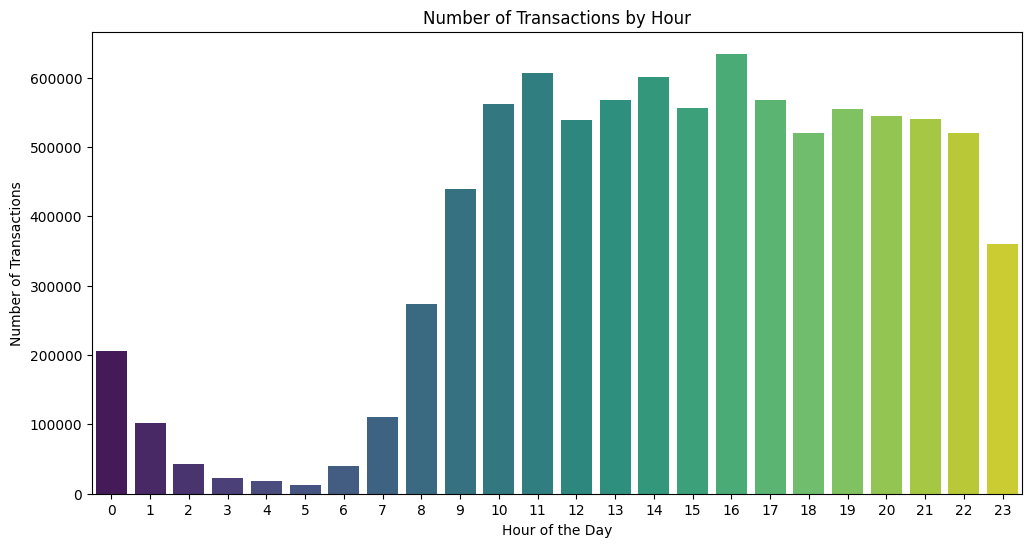

In [164]:
# Plot the number of transactions by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_dataset, x='order_hour', palette='viridis')
plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

There is a noticeable dip in transactions during the early morning hours, from midnight to 6 AM, which is expected as most customers are likely asleep. A gradual increase in transactions starts from 6 AM, peaking around 6 PM, indicating that customers are more active in making purchases during the evening.

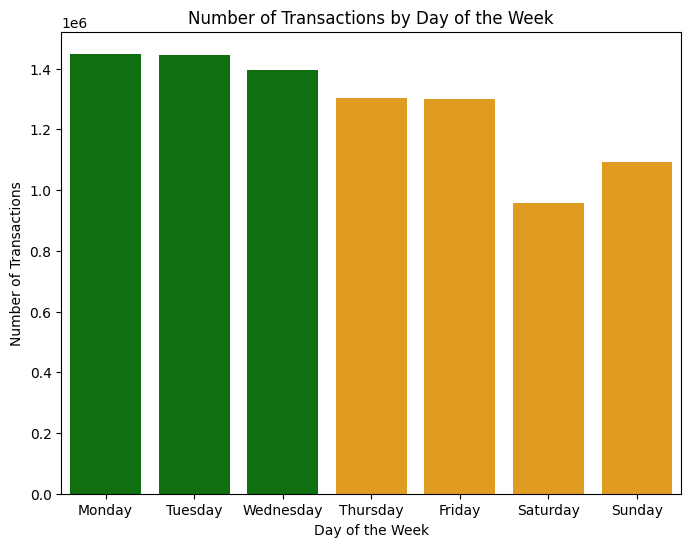

In [165]:
# Define colors for the bars
colors = ['green' if i < 3 else 'orange' for i in range(7)]

# Plot the number of transactions by day of the week
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_dataset, x='order_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

The 3 highest number of transactions occur on Monday, Tuesday, and Wednesday, indicating that customers are more active in making purchases during the weekdays.

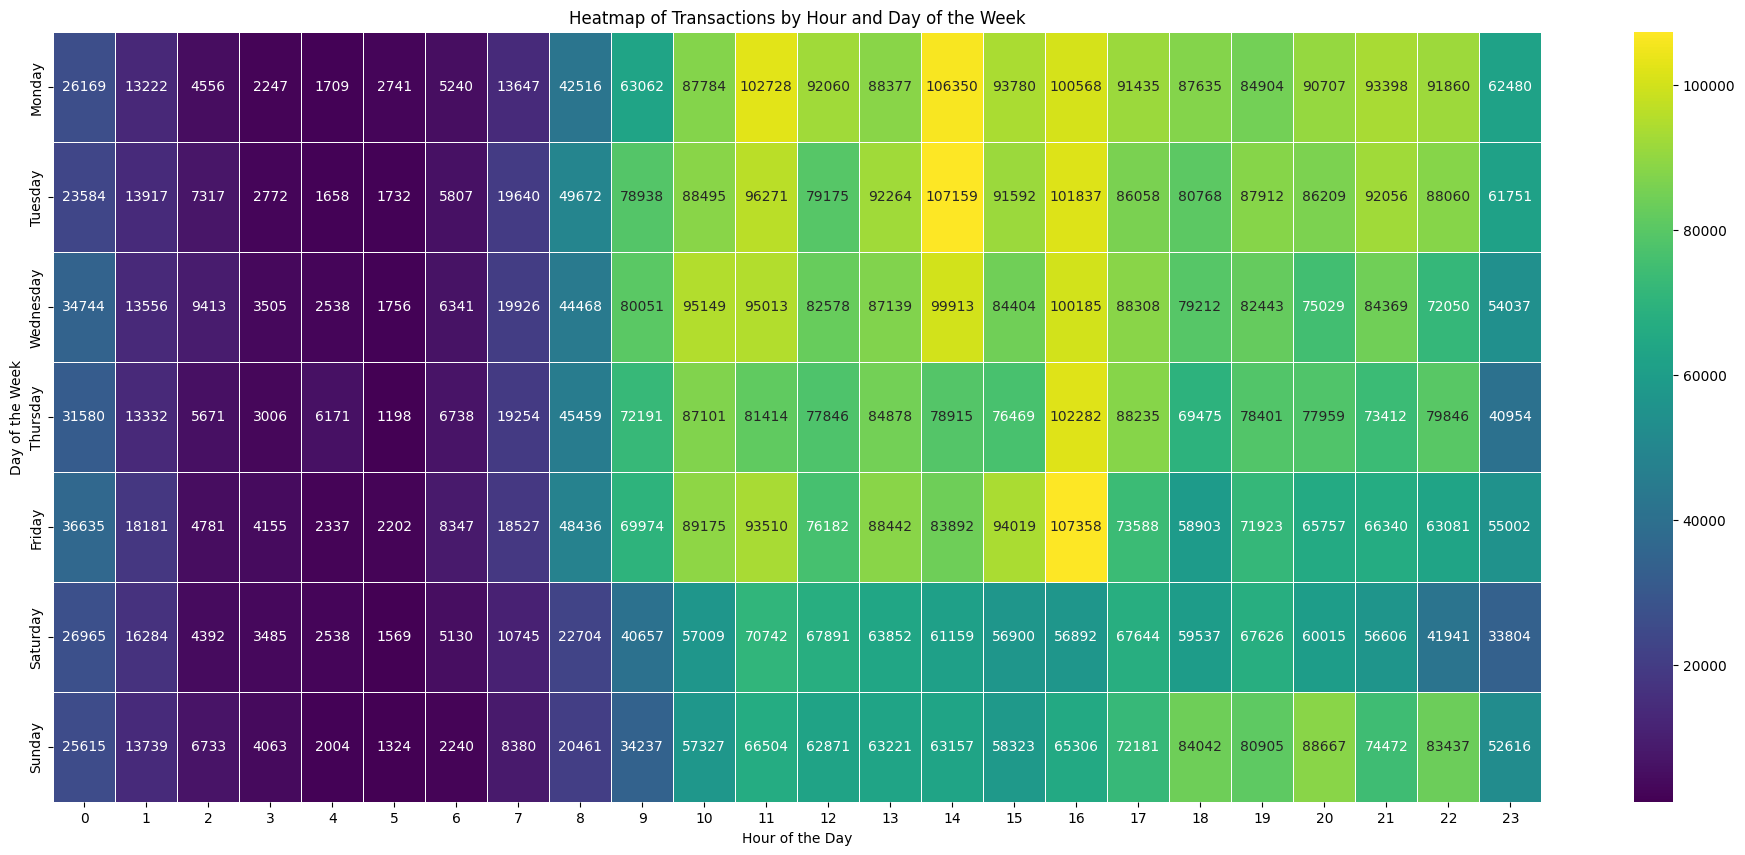

In [166]:
# Create a pivot table for heatmap
heatmap_data = filtered_dataset.pivot_table(index='order_day_of_week', columns='order_hour', values='order_id', aggfunc='count', fill_value=0)

# Reorder the index to ensure the days of the week are in the correct order
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the heatmap
plt.figure(figsize=(24, 10))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5, annot=True, fmt='d')
plt.title('Heatmap of Transactions by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

The hour with the highest number of transactions on Friday at 4 PM.

/tmp/ipykernel_150/1162739860.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['time_period'] = filtered_dataset['order_hour'].apply(get_time_period)


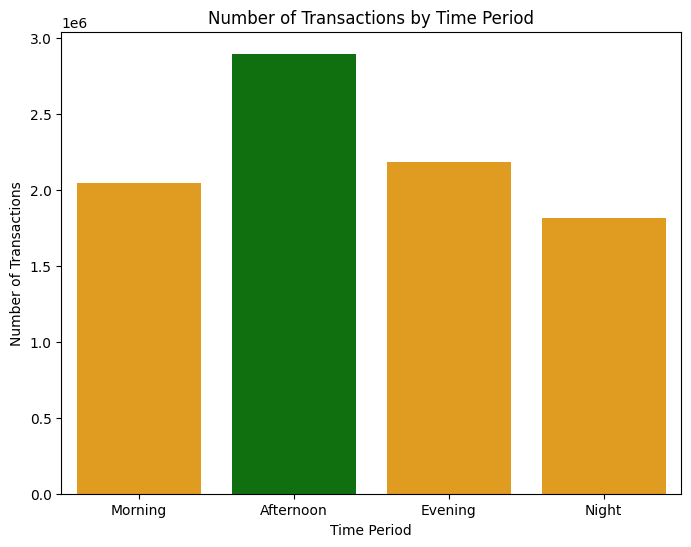

In [ ]:
# Define time periods
def get_time_period(hour):
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

# Apply the function to create a new column
filtered_dataset['time_period'] = filtered_dataset['order_hour'].apply(get_time_period)

# Define colors for the bars
colors = ['green' if i == 1 else 'orange' for i in range(4)]

# Plot the number of transactions by time period
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_dataset, x='time_period', order=['Morning', 'Afternoon', 'Evening', 'Night'], palette=colors)
plt.title('Number of Transactions by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Transactions')
plt.show()

Most customers make transactions in the afternoon.

#### **Total orders per month for the last 1 year**

/tmp/ipykernel_150/2856212012.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = filtered_dataset.resample('M', on='order_purchase_timestamp').size()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


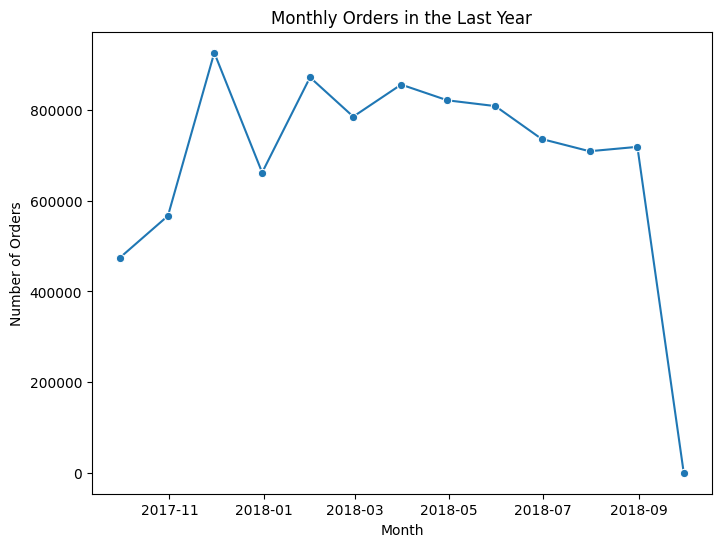

In [168]:
# Calculate the number of orders made per month
monthly_orders = filtered_dataset.resample('M', on='order_purchase_timestamp').size()

# Visualization of the number of orders per month
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o')
plt.title('Monthly Orders in the Last Year')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

Total orders tend to increase from month to month over the past year. However, the number of orders experienced a significant decline in January 2018, but stabilized again the following month.

In December 2017 was the peak of the highest total orders over the past year, considering that at the end of the year there is usually a year-end sale promo, this will be the right momentum to increase sales.

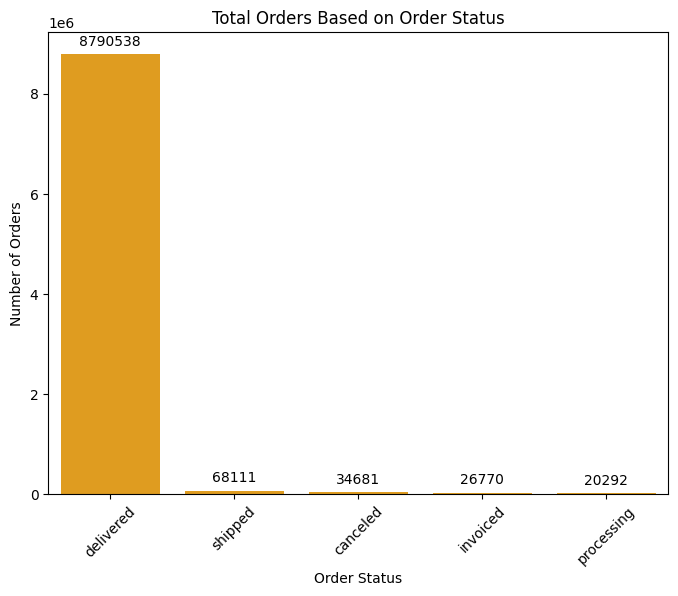

In [169]:
# Calculate the total orders based on order_status
order_status_counts = filtered_dataset['order_status'].value_counts()

# Visualization of the total orders based on order_status
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=order_status_counts.index, y=order_status_counts.values, color='orange')
plt.title('Total Orders Based on Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Add the number above each bar
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points')

plt.show()

This shows that the most orders were delivered to the customers.

#### **10 Cities with the highest total orders over the past year**

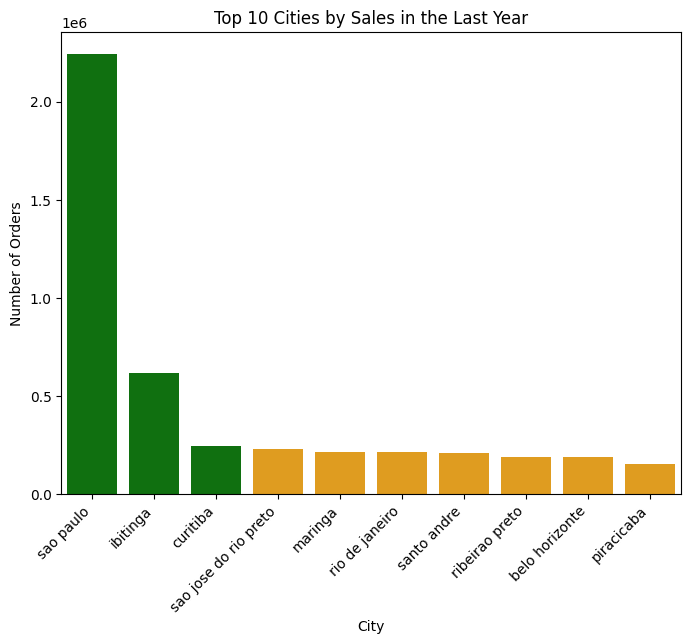

In [170]:
# Calculate the number of sales per city
city_sales = filtered_dataset.groupby('seller_city').size().sort_values(ascending=False).head(10)

# Define colors for the bars
colors = ['green' if i < 3 else 'orange' for i in range(10)]

# Visualization of sales per city for top 10 cities
plt.figure(figsize=(8, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities by Sales in the Last Year')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

Sao Paulo is the city with the highest total orders of more than 20,000 orders. The difference in the number of orders between Sao Paulo and the others is significant, but the 3rd to 10th cities in terms of total orders do not show significant differences.

#### **10 most ordered product categories in the last 1 year**

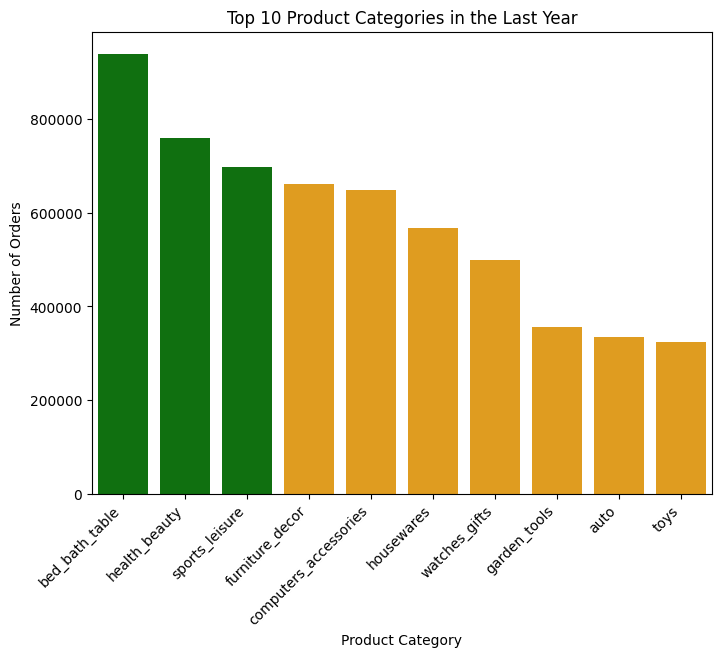

In [171]:
# Calculate the number of products sold for each category
top_categories = filtered_dataset['product_category_name_english'].value_counts().head(10)

# Define colors for the bars
colors = ['green' if i < 3 else 'orange' for i in range(10)]

# Visualization of top 10 product categories
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

Bed Bath Table is the product category most purchased by customers.

#### **10 least ordered product categories in the last 1 year**

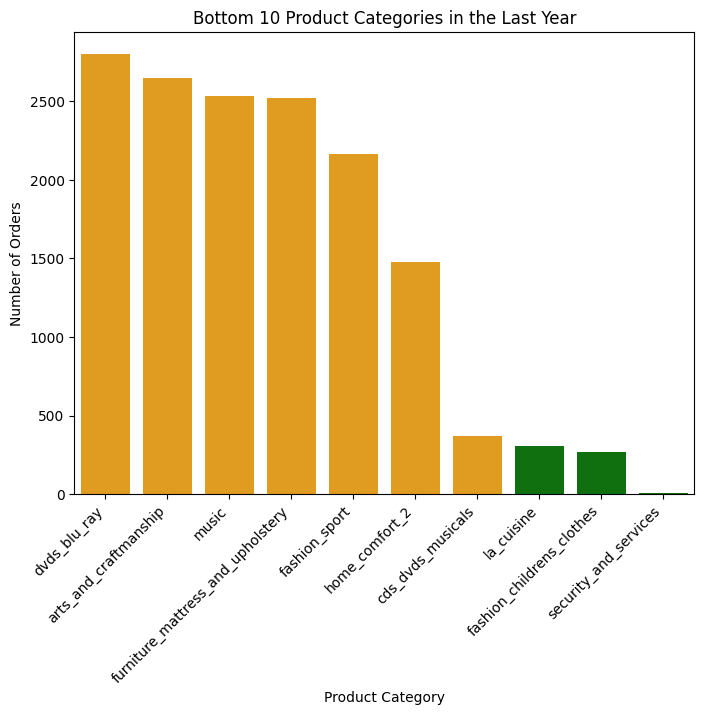

In [172]:
# Calculate the number of products sold for each category
top_categories = filtered_dataset['product_category_name_english'].value_counts().tail(10)

# Define colors for the bars
colors = ['green' if i >= 7 else 'orange' for i in range(10)]

# Visualization of bottom 10 product categories
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

Security and Services is the product category purchased least by customers.

#### **Distribution of reviews from the top 10 most ordered product categories**

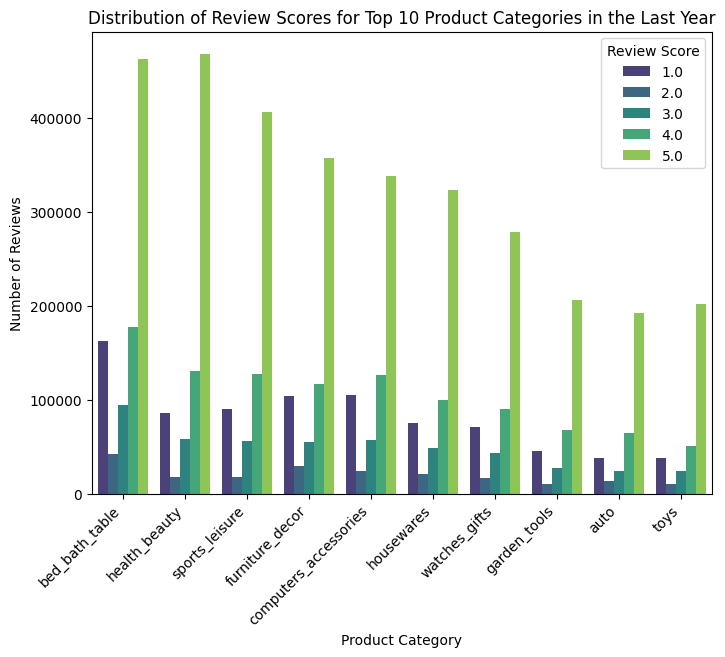

In [173]:
# Calculate the number of products sold for each category
top_categories = filtered_dataset['product_category_name_english'].value_counts().head(10).index

# Filter the dataset to only include the top ten categories
filtered_dataset_top_categories = filtered_dataset[filtered_dataset['product_category_name_english'].isin(top_categories)]

# Count the number of reviews for each category and sort them.
sorted_categories = filtered_dataset_top_categories['product_category_name_english'].value_counts().index

# Visualization of review score distribution for each category
plt.figure(figsize=(8, 6))
sns.countplot(x='product_category_name_english', hue='review_score', data=filtered_dataset_top_categories, order=sorted_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Review Scores for Top 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.show()

The majority of customers gave a review score of 5 for the ten most sold product categories.

#### **Distribution of reviews from the top 10 least ordered product categories**

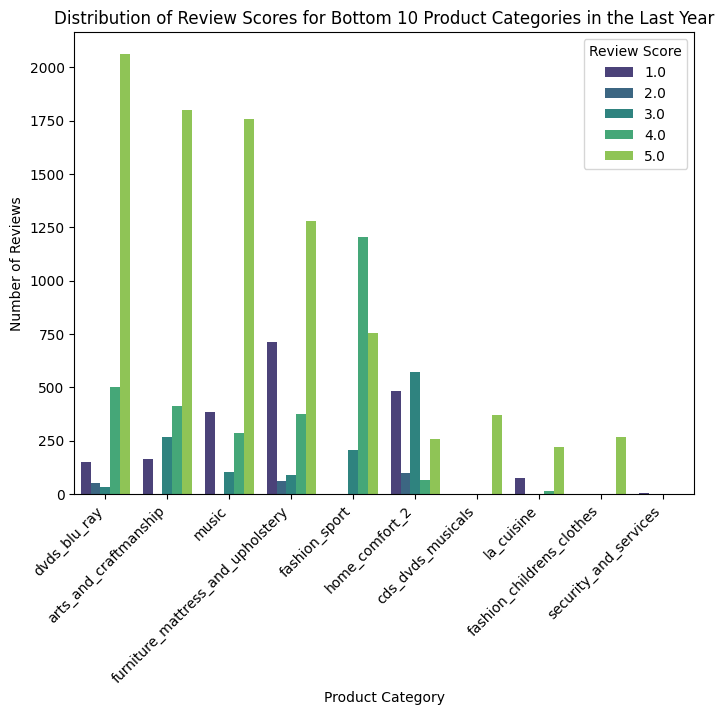

In [174]:
# Calculate the number of products sold for each category
top_categories = filtered_dataset['product_category_name_english'].value_counts().tail(10).index

# Filter the dataset to only include the top ten categories
filtered_dataset_top_categories = filtered_dataset[filtered_dataset['product_category_name_english'].isin(top_categories)]

# Count the number of reviews for each category and sort them.
sorted_categories = filtered_dataset_top_categories['product_category_name_english'].value_counts().index

# Visualization of review score distribution for each category
plt.figure(figsize=(8, 6))
sns.countplot(x='product_category_name_english', hue='review_score', data=filtered_dataset_top_categories, order=sorted_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Review Scores for Bottom 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.show()

The majority of customers gave a review score of 5 for the ten least sold product categories, only for the fashion sport category, it was dominated by a review score of 4.

### **2. How ​​long did it take for customers to receive their products during the last year?**

#### **Distribution of delivery time**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


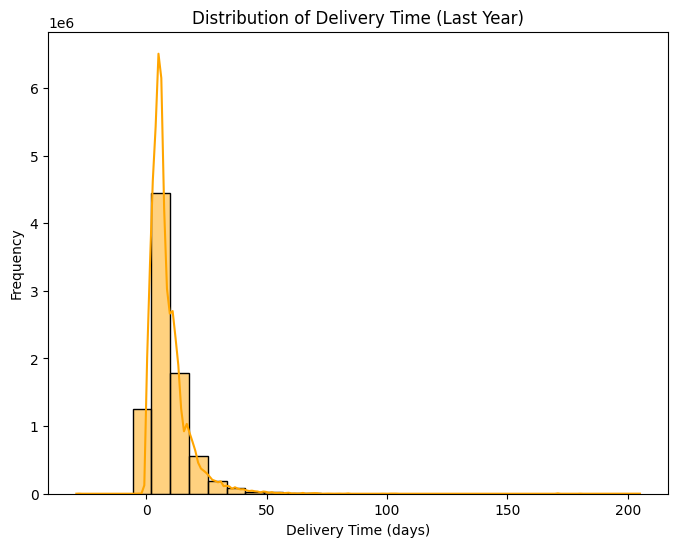

In [175]:
# Filter data for the last year
one_year_ago = dataset['order_delivered_customer_date'].max() - pd.DateOffset(years=1)
filtered_dataset = dataset[(dataset['order_delivered_customer_date'] >= one_year_ago) & (dataset['order_delivered_customer_date'] <= dataset['order_delivered_customer_date'].max())].copy()

# Calculating the length of delivery time
filtered_dataset['delivery_time'] = (filtered_dataset['order_delivered_customer_date'] - filtered_dataset['order_delivered_carrier_date']).dt.days

# Visualization of delivery time distribution
plt.figure(figsize=(8, 6))
sns.histplot(filtered_dataset['delivery_time'], bins=30, kde=True, color='orange')
plt.title('Distribution of Delivery Time (Last Year)')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()

The majority of orders are delivered within a reasonable and normal delivery time frame, which is 0 to 15 days.

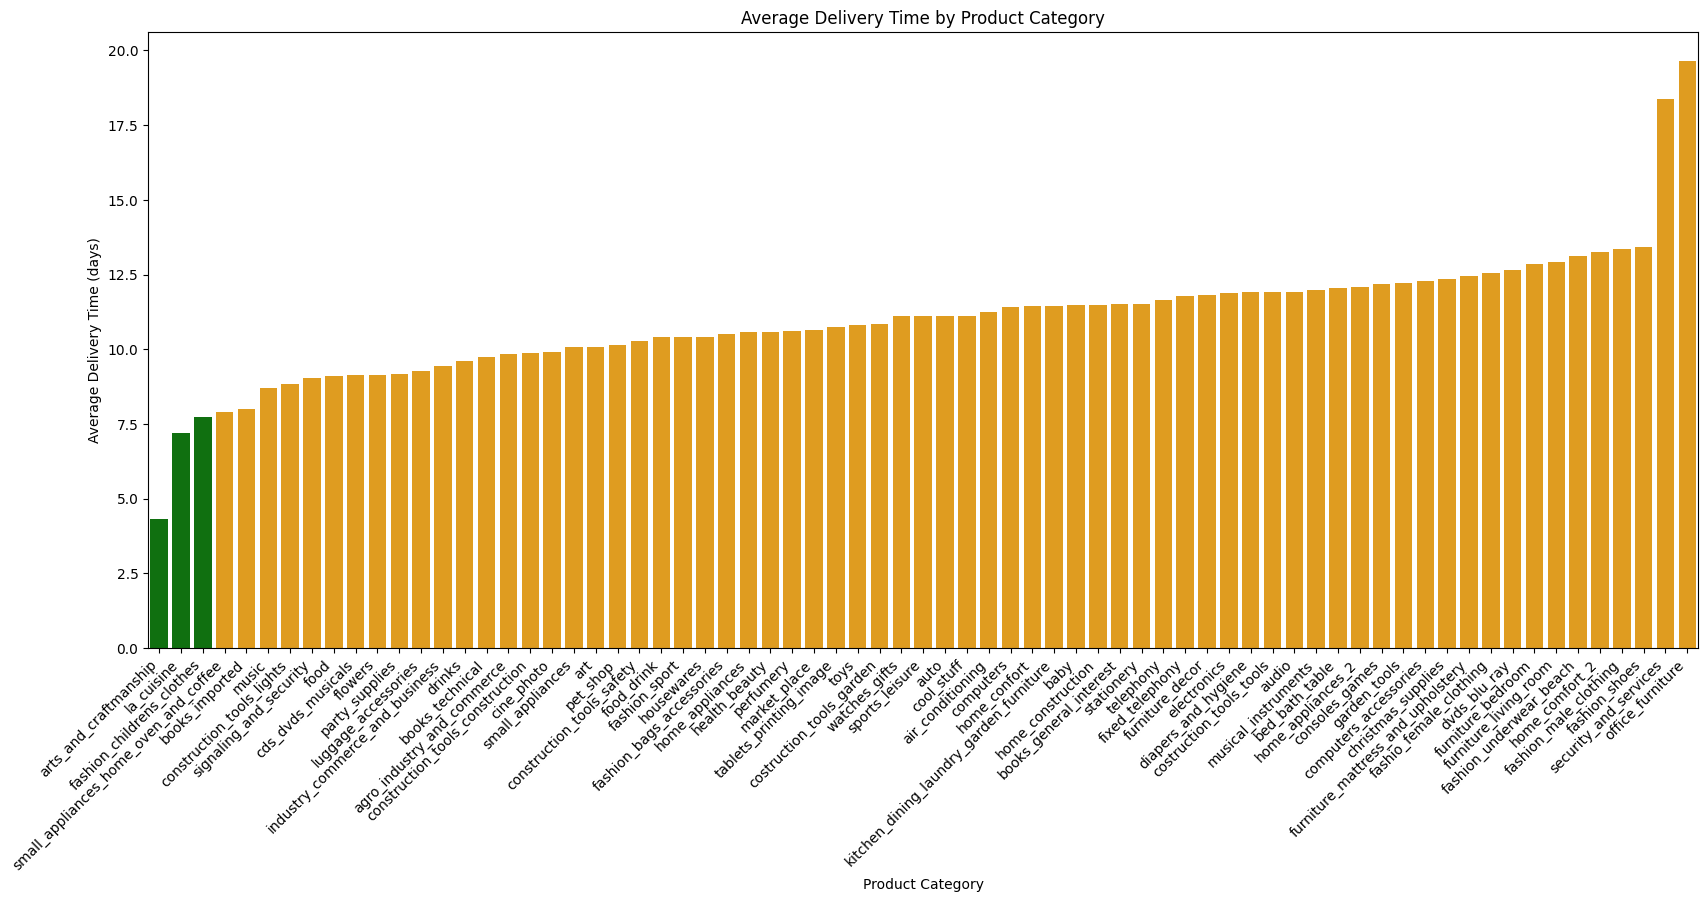

In [176]:
# Calculate the delivery time in days
dataset['delivery_time'] = (dataset['order_delivered_customer_date'] - dataset['order_approved_at']).dt.days

# Calculate the average delivery time by product category
avg_delivery_time_by_category = dataset.groupby('product_category_name_english')['delivery_time'].mean().sort_values()

# Define colors for the bars
colors = ['green' if i < 3 else 'orange' for i in range(72)]

# Visualization of average delivery time by product category
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_delivery_time_by_category.index, y=avg_delivery_time_by_category.values, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Average Delivery Time by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Delivery Time (days)')
plt.show()

The three product categories with the fastest average delivery are arts and craftsmanship, la cuisine, and fashion children's clothes.

#### **Delivery time by day of the week**

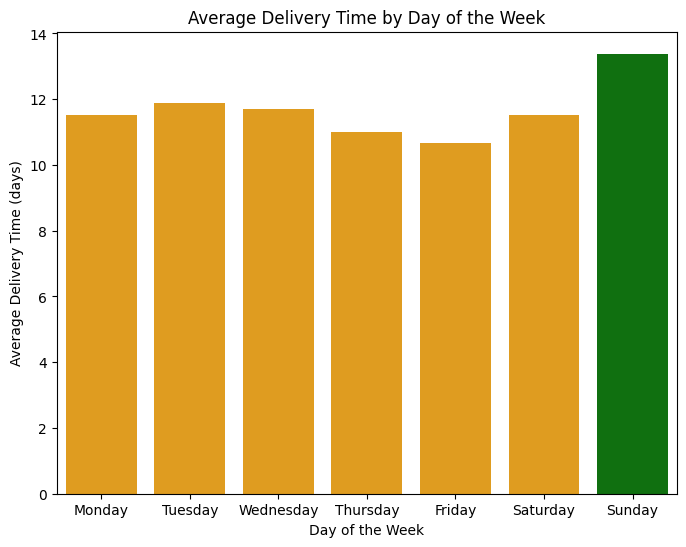

In [177]:
# Add a new column for the day of the week when the order was delivered
dataset['delivery_day_of_week'] = dataset['order_delivered_customer_date'].dt.day_name()

# Calculate the average delivery time by day of the week
avg_delivery_time_by_day = dataset.groupby('delivery_day_of_week')['delivery_time'].mean().reindex(
  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Define colors for the bars
colors = ['green' if i == 6 else 'orange' for i in range(7)]

# Visualization of average delivery time by day of the week
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_delivery_time_by_day.index, y=avg_delivery_time_by_day.values, palette=colors)
plt.title('Average Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delivery Time (days)')
plt.show()

The chart shows that the average delivery time is relatively consistent across most days of the week. However, there is a noticeable increase in delivery time on Sundays, which could be due to limited delivery services on weekends.

#### **Delivery time by region**

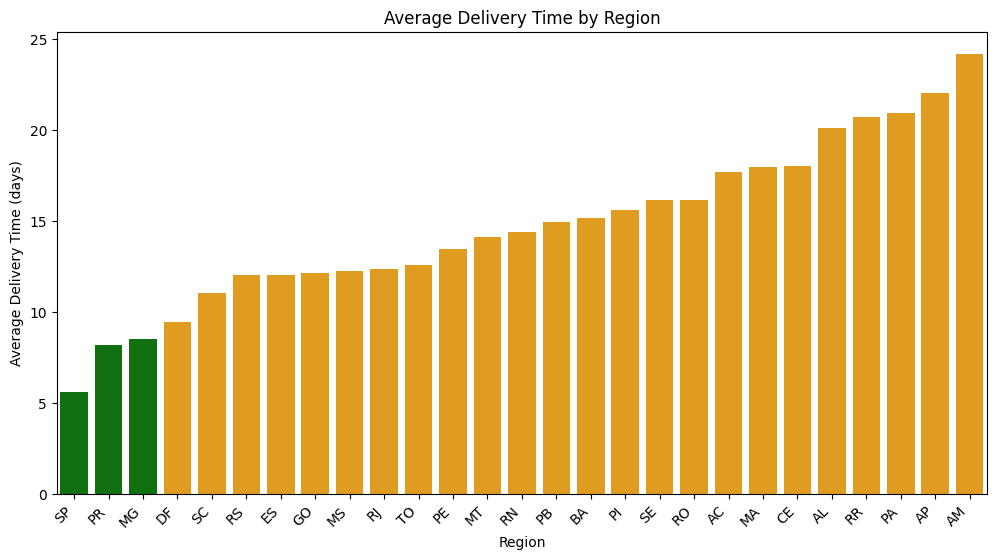

In [ ]:
# Calculate the average delivery time by region
avg_delivery_time_by_region = filtered_dataset.groupby('customer_state')['delivery_time'].mean().sort_values()

# Define colors for the bars
colors = ['green' if i < 3 else 'orange' for i in range(27)]

# Visualization of average delivery time by region
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delivery_time_by_region.index, y=avg_delivery_time_by_region.values, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Average Delivery Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Delivery Time (days)')
plt.show()

SP, PR, and MG are the three regions with the fastest average delivery times.

### **3. Which customer segment contributes the most to overall revenue? (Using RFM Analysis)**

In [179]:
# Creating RFM DataFrame
rfm_df = dataset.groupby(by="customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max",  # Last order date
    "order_id": "nunique",
    "payment_value": "sum"
})

# Change columns name
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Add Recency column
current_date = pd.to_datetime('2023-12-17')
rfm_df['recency'] = (current_date - rfm_df['max_order_timestamp']).dt.days

# Display the first few rows of the RFM DataFrame
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28 15:41:30,1,8605.50,2209
1,000161a058600d5901f007fab4c27140,2017-07-25 18:57:33,1,5864.67,2335
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06 08:57:49,1,33221.40,2476
3,0002414f95344307404f0ace7a26f1d5,2017-09-13 20:06:02,1,179.35,2285
4,000379cdec625522490c315e70c7a9fb,2018-04-13 20:21:08,1,7490.70,2073


In [180]:
# Display the first few rows of the RFM DataFrame
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = dataset["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Display the first few rows of the RFM DataFrame
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28,1,8605.50,323
1,000161a058600d5901f007fab4c27140,2017-07-25,1,5864.67,449
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06,1,33221.40,590
3,0002414f95344307404f0ace7a26f1d5,2017-09-13,1,179.35,399
4,000379cdec625522490c315e70c7a9fb,2018-04-13,1,7490.70,187


In [181]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,8605.50,323
1,000161a058600d5901f007fab4c27140,1,5864.67,449
2,0001fd6190edaaf884bcaf3d49edf079,1,33221.40,590
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399
4,000379cdec625522490c315e70c7a9fb,1,7490.70,187


In [182]:
rfm_df.describe()

,frequency,monetary,recency
count,96248.0,9.624800e+04,96248.000000
mean,1.0,2.123759e+04,276.403084
std,0.0,8.300974e+04,152.778984
min,1.0,2.551000e+01,0.000000
25%,1.0,3.240150e+03,154.000000
50%,1.0,7.810965e+03,257.000000
75%,1.0,1.885573e+04,387.000000
max,1.0,1.123869e+07,760.000000


In [183]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
1269,033fab69968b0d69099d64423831a236,1,312.41,0
15000,27ae7c8a8fc20ce80d96f01b6f19961b,1,1413.72,6
59638,9e83d47684eb1a58b1c31830f5de10ac,1,8514.24,15
96116,ffa87b4246c4848711afb512bd51f161,1,3989.10,20
7512,1409b2945191b7aff1975ba2ce9918c5,1,130.70,22


In [184]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,8605.50,323
64162,aa58d8cc9b866d3ff15d1875adb9edb3,1,3620.80,295
64171,aa5dfb0872b3828aa250acb54d387266,1,11711.13,501
64170,aa5de1c726fedb2c495cea4ead03d6d8,1,9936.35,363
64169,aa5d81c64ac61c8124eb6c249c2c2ca5,1,4769.76,394


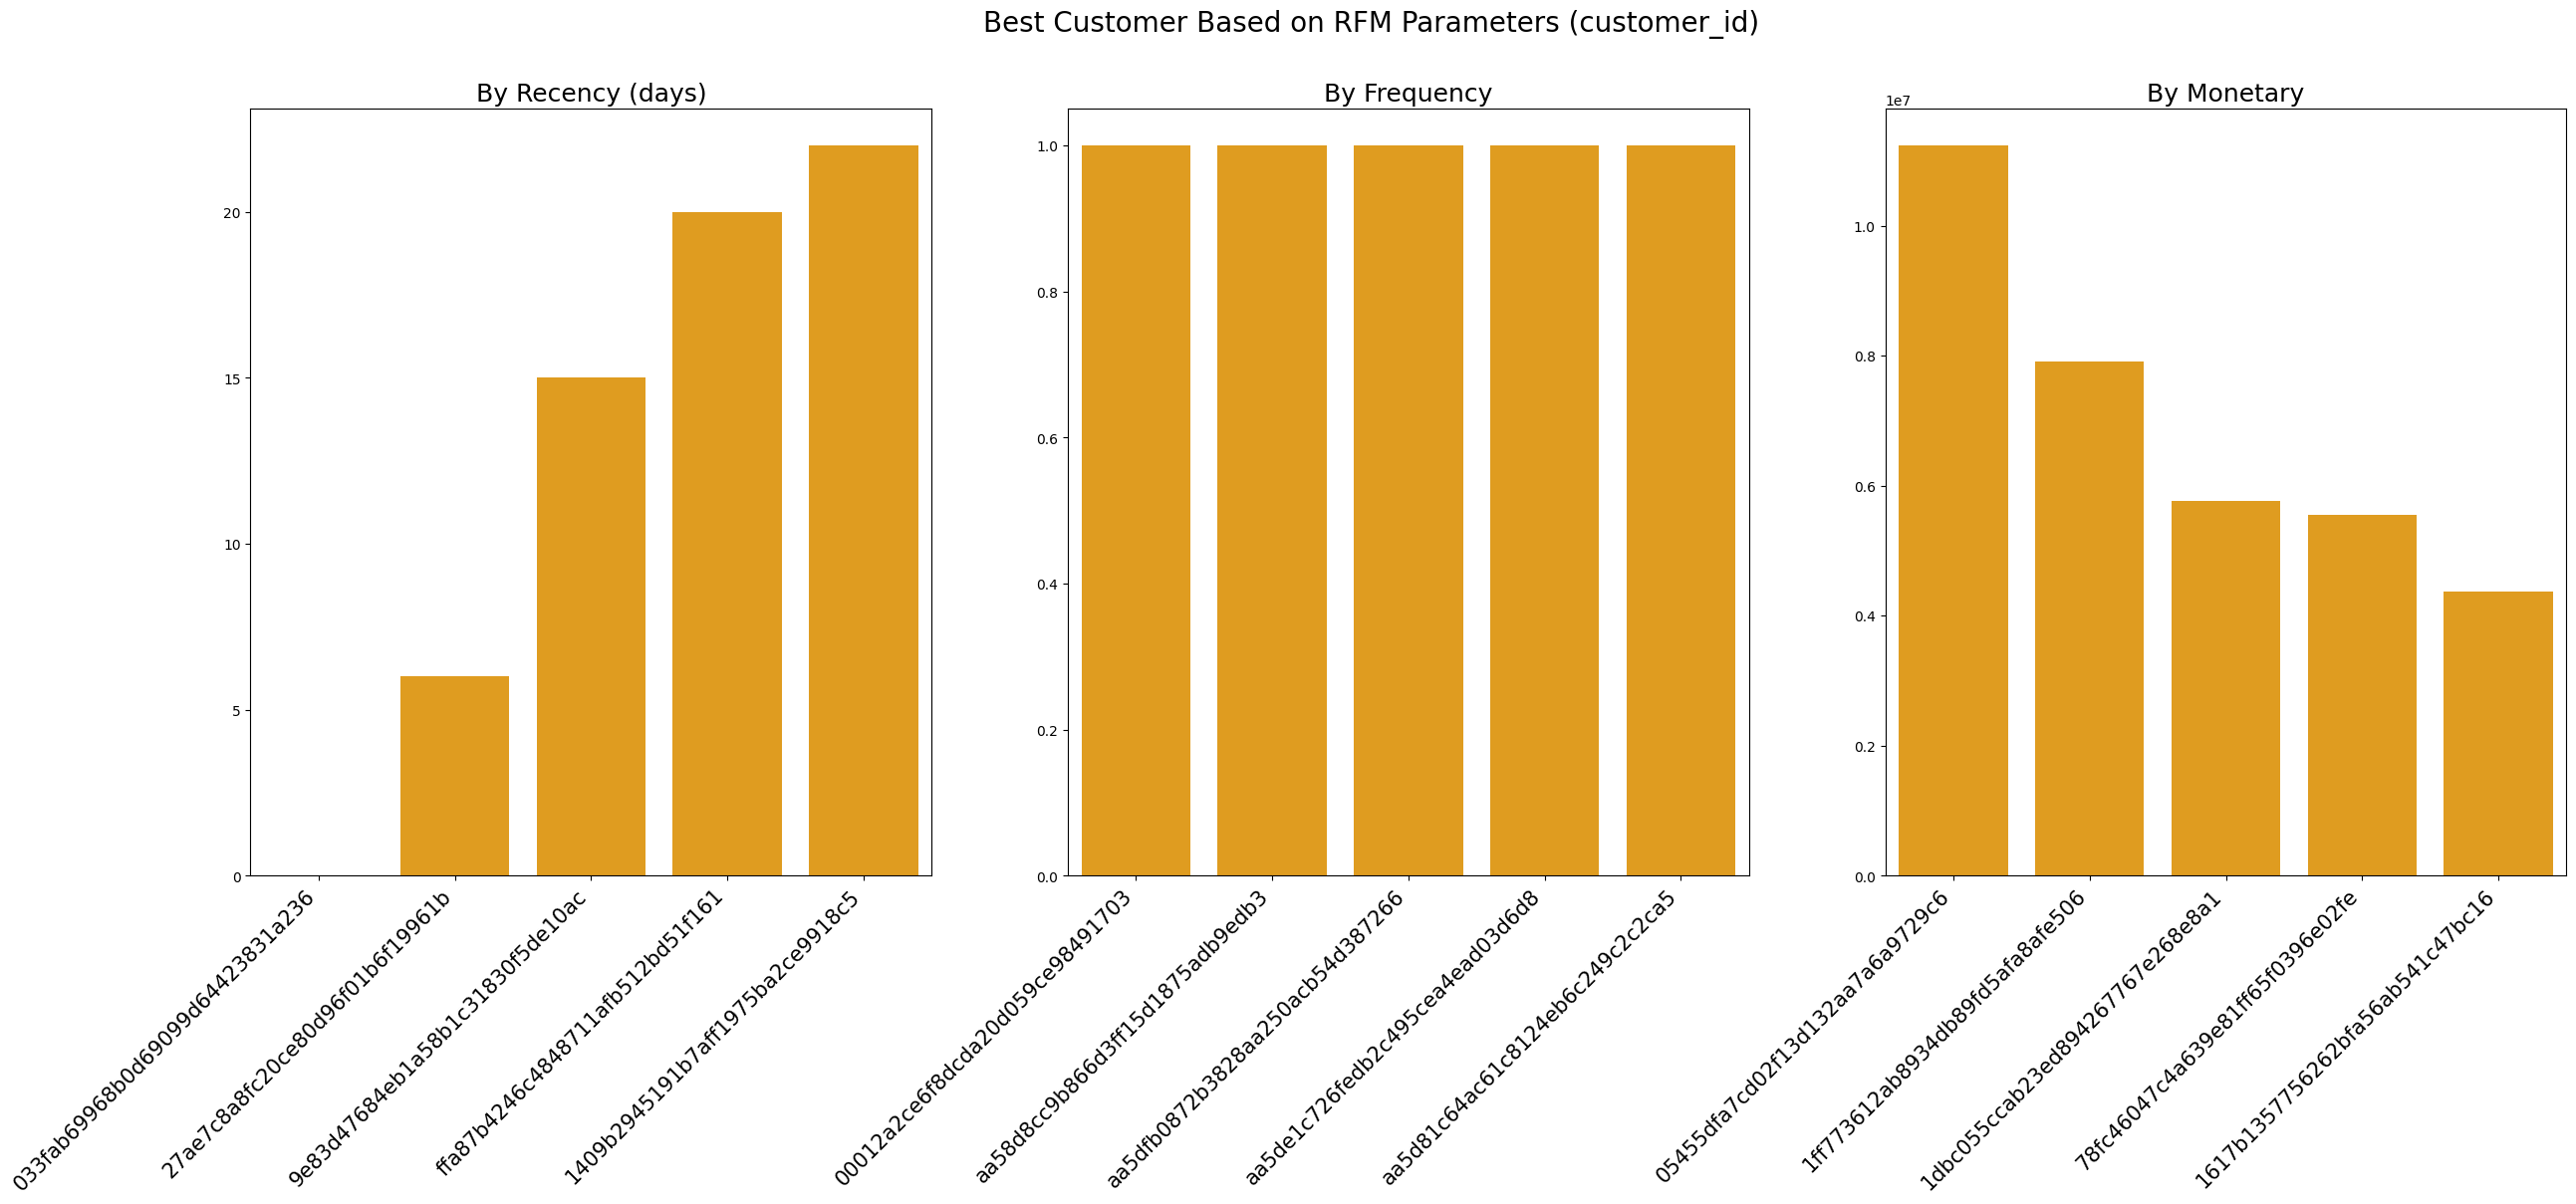

In [185]:
# Change the column name according to the dataset
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Visualization based on Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color='orange', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Visualization based on Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color='orange', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Visualization based on Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color='orange', ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### **Sort customers by recency, frequency, and monetary score**

In [186]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,8605.50,323,33355.5,48124.5,50954.0
1,000161a058600d5901f007fab4c27140,1,5864.67,449,15711.0,48124.5,39849.0
2,0001fd6190edaaf884bcaf3d49edf079,1,33221.40,590,2266.0,48124.5,83054.0
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399,22398.0,48124.5,452.0
4,000379cdec625522490c315e70c7a9fb,1,7490.70,187,63872.0,48124.5,46891.0


In [187]:
# Normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,8605.50,323,34.655785,100.0,52.940321
1,000161a058600d5901f007fab4c27140,1,5864.67,449,16.323456,100.0,41.402419
2,0001fd6190edaaf884bcaf3d49edf079,1,33221.40,590,2.354335,100.0,86.291663
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399,23.271133,100.0,0.469620
4,000379cdec625522490c315e70c7a9fb,1,7490.70,187,66.361898,100.0,48.718934


In [188]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.17
1,000161a058600d5901f007fab4c27140,2.70
2,0001fd6190edaaf884bcaf3d49edf079,3.88
3,0002414f95344307404f0ace7a26f1d5,1.59
4,000379cdec625522490c315e70c7a9fb,3.29
5,0004164d20a9e969af783496f3408652,2.81
6,000419c5494106c306a97b5635748086,4.09


#### **Customer segmentation based on RFM score**

In [189]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.17,Medium value customer
1,000161a058600d5901f007fab4c27140,2.70,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.88,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,1.59,Lost customers
4,000379cdec625522490c315e70c7a9fb,3.29,Medium value customer
5,0004164d20a9e969af783496f3408652,2.81,Low value customers
6,000419c5494106c306a97b5635748086,4.09,High value customer
7,00046a560d407e99b969756e0b10f282,4.28,High value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,4.08,High value customer
9,000598caf2ef4117407665ac33275130,4.94,Top customers


In [190]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15338
1,Lost customers,916
2,Low value customers,40550
3,Medium value customer,33925
4,Top customers,5519


In [191]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


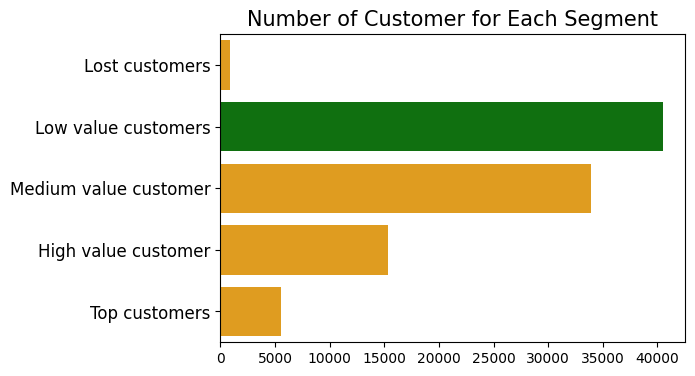

In [192]:
plt.figure(figsize=(6, 4))

# Define colors for the bars
colors = ['green' if i == 1 else 'orange' for i in range(5)]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Most customers fall into the low-value and medium-value segments.

## **Conclusion**

1. **How has the product sales performance been over the past year?**
  - The total number of orders has generally increased month over month over the past year, with a significant peak in December 2017, likely due to year-end sales promotions. However, there was a notable decline in January 2018, which stabilized in the following months.
  - Sao Paulo is the city with the highest total orders, significantly outpacing other cities.
  - The product category "Bed Bath Table" was the most purchased by customers, while "Security and Service" was the least purchased.
  - The majority of customers gave a review score of 5 for both the most and least sold product categories.

2. **How ​​long did it take for customers to receive their products during the last year?**
  - The majority of orders were delivered within 0 to 15 days, which is considered a reasonable and normal delivery time frame.
  - The average delivery time varied by product category and region, with some categories and regions experiencing longer delivery times than others.
  - The average delivery time also varied by the day of the week, with some days having faster delivery times on average.

3. **Which customer segment contributes the most to overall revenue? (Using RFM Analysis)**
  - The RFM analysis segmented customers into five categories: Top customers, High value customers, Medium value customers, Low value customers, and Lost customers.
  - The "Top customers" and "High value customers" segments contribute the most to overall revenue, with the highest RFM scores indicating frequent and high-value purchases.
  - The majority of customers fall into the "Low value customers" and "Lost customers" segments, indicating opportunities for targeted marketing and engagement strategies to move them into higher value segments.